#**IEEE SSCS “PICO” OPEN-SOURCE CHIPATHON 2023**
#**Phase Locked Loop Based Tunable Clock Generator for ADC and DAC**


# **Members**
```markdown
Name                                | EMAIL             |DEGREE PROGRAM AND INSTITUTION                                                             |
------------------------------------|-------------------|-------------------------------------------------------------------------------------------|
Engr. Sanaullah Hukam (TEAM LEAD)   | i229905@nu.edu.pk | Masters in IC Design from (NUCES National University of Computer And Emerging Sciences    |              
Engr. Muhammad Ahmad Aljeelani      | i229908@nu.edu.pk | Masters in IC Design from (NUCES National University of Computer And Emerging Sciences)   |              
Engr. Muhammad Usama                | i229937@u.edu.pk  | Masters in IC Design from (NUCES National University of Computer And Emerging Sciences)   |            
Engr. Muhammad Ibrahim              | i229912@nu.edu.pk | Masters in IC Design from (NUCES National University of Computer And Emerging Sciences)   |
```  

# **Supervisors**
```markdown
Name                     | EMAIL                   |INSTITUTION 
-------------------------|-------------------------|--------------------------------------------------------------
Dr. Rashad Ramzan        | rashad.ramzan@nu.edu.pk | NUCES National University of Computer And Emerging Sciences  |
Dr. Hassan Saif          | hassan.saif@nu.edu.pk   | NUCES National University of Computer And Emerging Sciences  |         
Engr. Hamza Atiq         | hmz1075@gmail.com       | NUCES National University of Computer And Emerging Sciences  |
`````

# **1. Abstract**

In this proposal, we designed a Tunable Clock Generator based Phase Locked Loop (PLL), which consists of a Phase Detector (PD), Loop Filter (LP), Oscillator, and Clock Dividers. These components work in harmony to achieve stable and accurate phase synchronization. The design features include a 2nd order loop filter and VCO with a differential output frequency of 180-200 MHz and 90-110 MHz for the ADC and DAC of the Lab bench as for Analog Discoveries. It achieves a jitter of 500 fs and phase noise less than -100dBc/Hz at 1MHz. The design has been implemented and simulated at 130nm, with some blocks implemented on the open-source tool "Xschem". The complete implementation using open-source tools on GF180MCU is the next step of this project.

#   **2. Target Specifications**

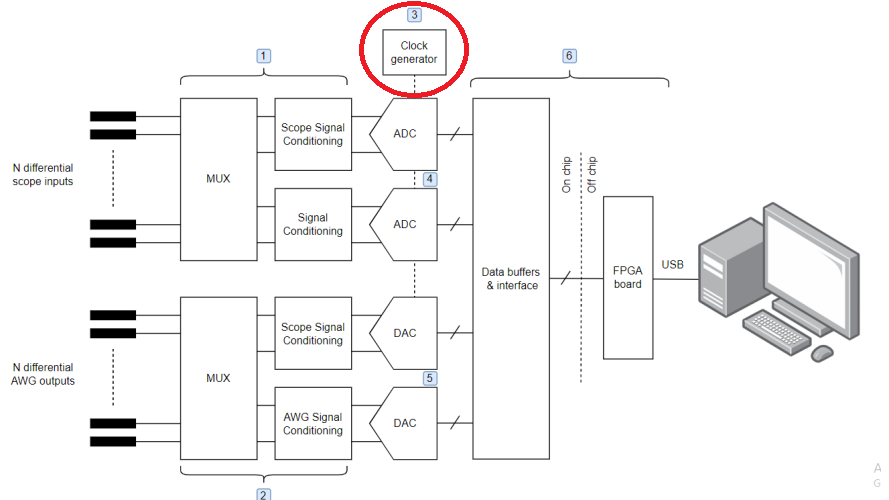

 
**Figure 1: SSCS PICO Chipathon-2023 Block Diagram**


**Table 1:PLL Target Specifications**
```markdown
Parameters                                 | Values               |
-------------------------------------------|----------------------|
Output Clock frequency 1 (Differential)    | 200 MHz              |
Output Clock frequency 2 (Single ended)i   | 100 MHz              |
Reference Input Frequency                  | 2 MHz                |
Phase Noise                                | -100 dBc/Hz @ 1 MHz  |
Jitter                                     | 1ps                  |
`````

# **3. Motivation**
The motivation behind this project proposal stems from the need for precise signal synchronization in the lab bench. With the increasing reliance on accurate communication, data transfer, and timing, there is a growing demand for reliable solutions. Phase-Locked Loops (PLLs) offer an effective means to achieve stable and synchronized signals. However, there are challenges to overcome, such as improving performance, reducing jitter noise, phase noise, expanding frequency range, and optimizing control algorithms. 

This project aims to address these challenges and contribute to the advancement of PLL technology. By enhancing reliability, reducing complexity, and unlocking new applications, the outcomes will benefit industries such as telecommunications, aerospace, medical devices, and consumer electronics. The project's impact extends beyond industry, enabling progress in areas like 5G networks, IoT, and high-speed data processing. Ultimately, this research will facilitate technological advancements and societal benefits.

In summary, this project is motivated by the need for accurate signal synchronization with minimum jitter and aims to advance PLL technology to meet demands and enable broader technological progress.


# **4. Introduction**

A Phase-Locked Loop (PLL) is a versatile electronic circuit widely employed in various applications across different domains. It plays a crucial role in communication systems, frequency synthesis, clock generation, and synchronization. The primary objective of a PLL is to produce stable and precise output signals by comparing the phase and frequency of an input signal with those of a controlled oscillator.


At its core, a PLL consists of several essential components. The phase detector is responsible for comparing the input signal's phase with the controlled oscillator's output signal. Based on this phase comparison, the phase detector generates a control voltage proportional to the phase difference. This control voltage is then passed through a low-pass filter to eliminate high-frequency noise and provide a smooth and stable input to the voltage-controlled oscillator (VCO). The VCO, influenced by the filtered control voltage, generates an output signal with a frequency directly related to the control voltage applied. As the control voltage changes, the VCO's frequency adjusts accordingly, striving to minimize the phase and frequency difference between the input and output signals. In certain cases, a divider may be included to divide the VCO's output frequency for tracking specific frequency multiples of the reference input.


# **5. Block Diagram**  
The block diagram for the proposed clock generator is shown is Figure 2.

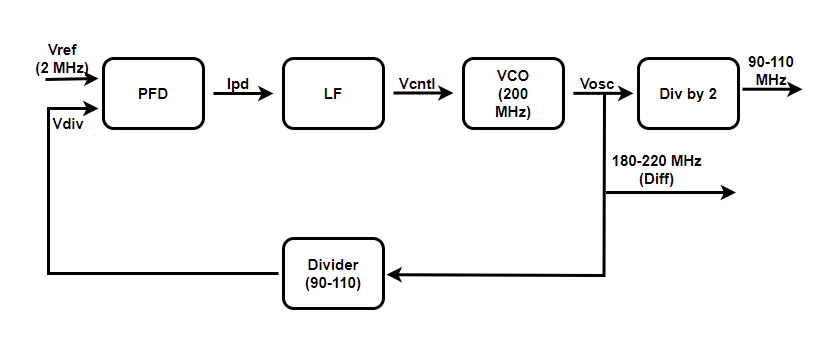

**Figure 2: Block Diagram PLL**


# **6. Phase Frequency Detector**
A phase detector is an electronic circuit that measures the phase difference between two signals. In this case, we need a phase detector that can accurately detect the phase difference between an input signal with a frequency of 20 MHz and a square wave amplitude of 0-3V, and a voltage-controlled oscillator (VCO) with a frequency range of 180-220 MHz and a voltage control range of 0.8-1.2V.

One possible implementation of a phase detector that meets these specifications is a phase-frequency detector using flip-flops and a NAND gate. The phase-frequency detector is a type of synchronous detector that compares the phase and frequency of two signals and outputs a signal that indicates whether the two signals are in-phase or out-of-phase.

The basic idea of a phase-frequency detector is to use two active low reset flip-flops to sample the input signal and the VCO signal, and a NAND gate to compare the two samples. The output of the NAND gate will be high when the two signals are out of phase, and low when they are in phase. The output of the NAND gate is then low-pass filtered to produce a DC voltage that represents the phase difference between the two signals.

To implement this phase detector, we can use two D flip-flops and a NAND gate [1-3], as shown in Figure 3:

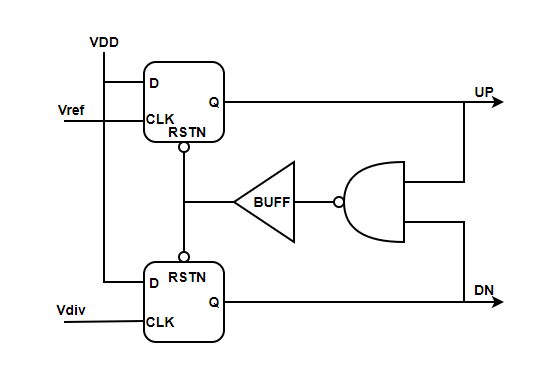



**Figure 3: Block Diagram of Phase Frequency Detector**

The Kpd for the Phase Detector is given as

$K_{pd} = \frac{Ich}{2\pi}$



### **6.1 Schematics**

The schematic diagram for phase detector implementation is shown in Figure 4. The input reference signal is fed into the CLK input of FF1, and the output divide signal is fed into the CLK input of FF2. As the FFs are negative edge triggered shown in Figure 5, Inverters as used. The VDD is fed into the D input of both flip flops. The Q output of FF1 and FF2 are fed into inputs of the NAND gate, and the output of the NAND gate is fed to the RST input of both FFs.


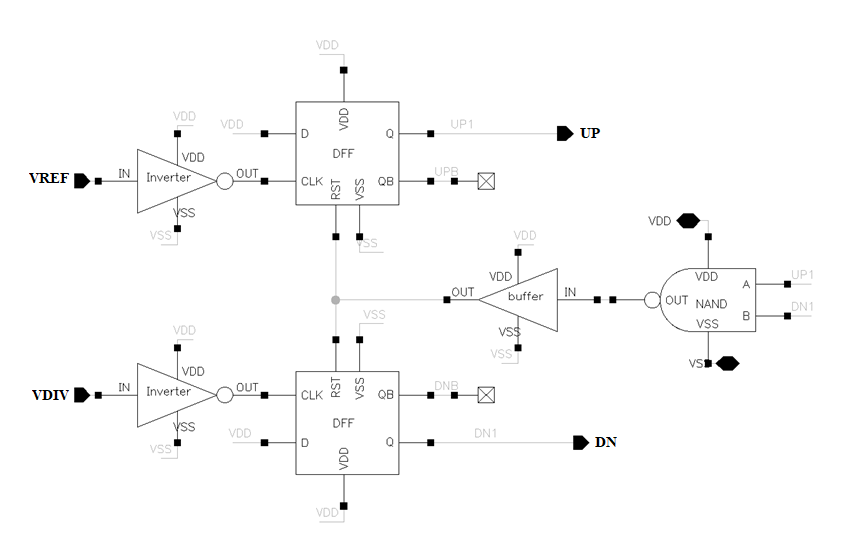

**Figure 4: Schematics Diagram of Phase Frequency Detector**


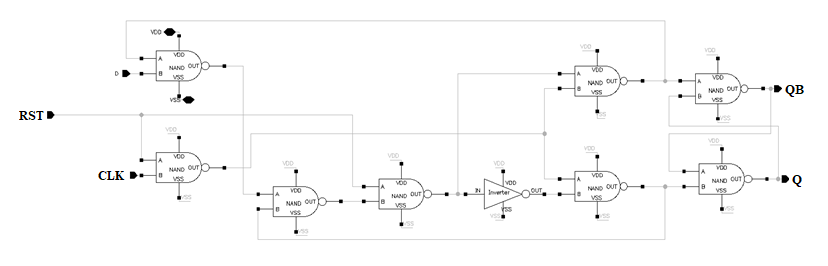



**Figure 5: Schematics D Flip Flop**

### **6.2 Simulations Phase Frequency Detector**

The Simulation Results are presented below. Figure 6, shows when the reference signal leads the divided signal, FF1 will pass VDD to Q1, and the UP signal will be high until the edge of the divided clock arrives. At this point, both signals will be high, causing the output of the NAND gate to go low, and resetting both Q1 and Q2 to zero. The same process occurs when the divided clock leads the reference signal, the DN signal will get high until the edge of the reference clock arrives as shown in Figure 7. 

When the input signal and divided signal are in-phase shown in Figure 8, both flip-flops will toggle on the rising edge of the clock signal, resulting in the output of the NAND gate being low. This causes both Q1 and Q2 outputs to reset to zero.


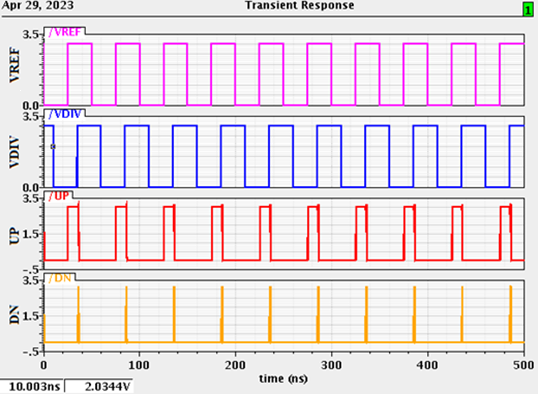

**Figure 6: Simulation Results of Phase Frequency Detector VREF Leading**


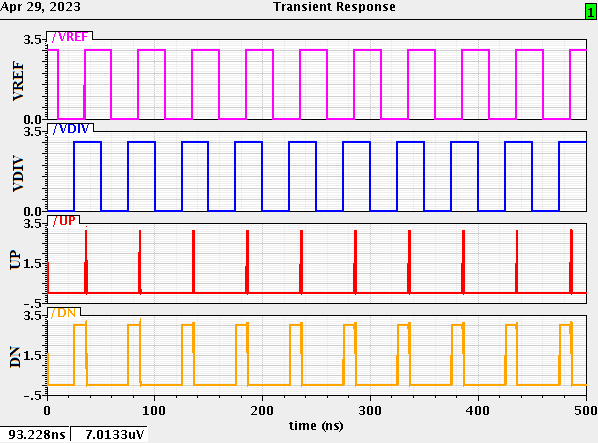

**Figure 7: Simulation Results of Phase Frequency Detector VDIV Leading**


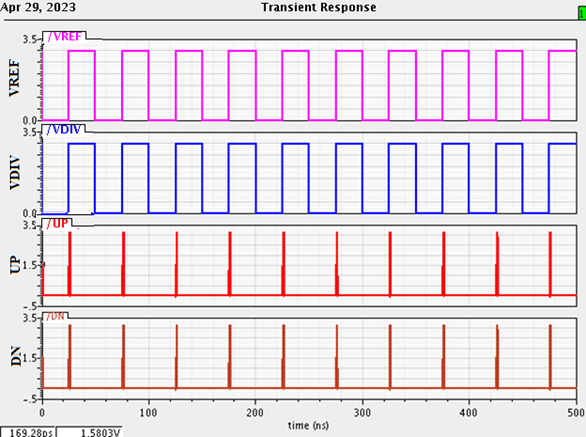

**Figure 8: Simulation Results of Phase Frequency Detector VREF in Phase with VDIV**




# **7. Loop Filter**

A Phase-Locked Loop (PLL) is an electronic control system used in various applications, such as clock generation, frequency synthesis, and synchronization. The PLL's key component is the loop filter, which plays a crucial role in maintaining stability and accuracy in the system. This write-up provides an overview of the loop filter's function, its basic design, and its impact on the overall performance of a PLL.

The loop filter is responsible for smoothing the output of the phase detector, a component that compares the phase of the input signal (reference signal) and the output signal (feedback signal) of the PLL. The phase detector generates an error signal proportional to the phase difference between the two signals. The loop filter processes this error signal to provide a continuous control voltage, which is applied to the voltage-controlled oscillator (VCO) in the PLL.

The loop filter is typically implemented using passive components, such as resistors, capacitors, and sometimes inductors. The specific configuration of the loop filter is given in Figure 9 along with the charge pump [3], but the most common type is the second-order type II loop filter. This type includes a charge pump and a low-pass filter stage to shape the response of the control voltage.

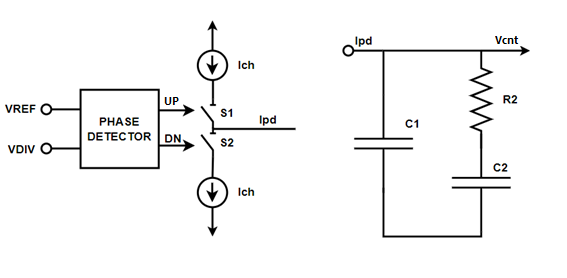


**Figure 9: Loop Filter [4]**

Low-Pass Filter: The low-pass filter stage removes high-frequency noise and harmonics from the control voltage, ensuring a smooth and stable response. It consists of passive components, such as resistors and capacitors, that form a low-pass RC filter. The filter's corner frequency, determined by the values of the components, should be set to allow the specification as presented in Table 2.

**Table 2: Loop Filter Specification**
 
**Parameters**               	|**Values**  | 
------------------------------|------------|
Output Frequency (fo)         |180-220 MHz | 
Reference Frequency (fREF)	  |2 MHz       | 
Filter Bandwidth (ω 3dB)	    |100 kHz     |
Quality Factor (Q)	          |0.3         |
VCO Gain (KOSC)	              |133 MHz/V   | 
Charge Pump Current (IPD)	    |20 uA       | 
Phase Detector Constant (KPD)	|3.18 u      | 

### **7.1 Loop Filter Designing**

$z(s) = (R + \frac{1}{sC_1}) || \frac{1}{sC_2}$

equates to

$z(s) = \frac{{1 + RC_2s}}{{(C_1 + C_2)s + RC_1C_2s^2}}$

Designing of loop Filter

$\omega_{3dB} = \frac{\omega_{pll}}{Q}$

and 

$K_{lp} = \frac{{Q^2 \cdot \omega_{3dB} \cdot N}}{{K_{pd} \cdot K_{osc}}}$

while

 $K_{pd} = \frac{I_{ch}}{2 \pi}$
 and $K_{lp} = \frac{1}{C_1}$


we get

$C_1 = \frac{I_{ch} \cdot K_{osc}}{2 \pi \cdot Q^2 \cdot \omega_{3dB}^2 \cdot N}$

To find the Value of R we know that

$\omega_z = \omega_{3dB} \cdot Q^2 = \frac{1}{R \cdot C_1}$

So,

$R = \frac{1}{C_1 \cdot \omega_z}$

### **7.2 Schematic of Loop Filter**

The schematic Diagram of the loop filter is presented in Figure 10. The outputs of phase detector PU and DN go into the charge pump switches. The 'Pu' and 'Pd' outputs of Phase Detector turn ON and Off the Positive and negative 'Ich' respectively. The 'Ipd' gives rise to 'VPD' based upon the values of 'R', 'C1', and 'C2'. The loop filter gives out VPD which operates the Voltage Controlled oscillator.


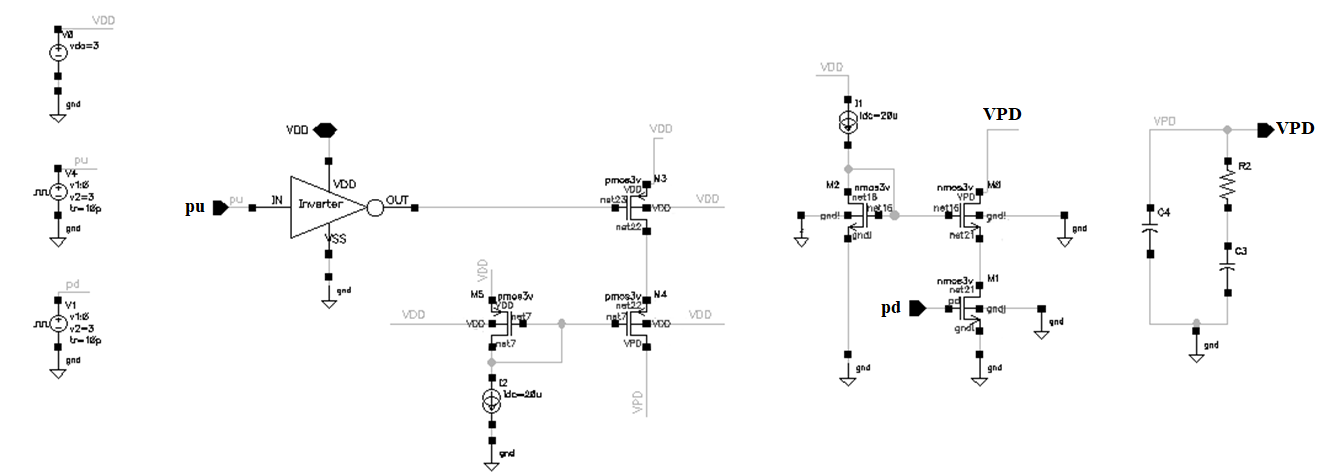

**Figure 10: Schematic of Loop Filter and Charge Pump**

### **7.3 Simulations of Loop Filter**
In order the analyze the operation of the above-implemented loop filter, the inputs are applied to "pu" and "pd" to the loop filter. Initially, the output of the loop filter is 800 mV. A pulse of 3V is applied to at "pu", as long as the pulse is there, the VPD rises linearly to 855mV, then the pulse gets zero, VPD remains constant then a "pd" pulse occurs which discharges the VPD back to 800 mV. And same process repeats as shown in Figure 11.



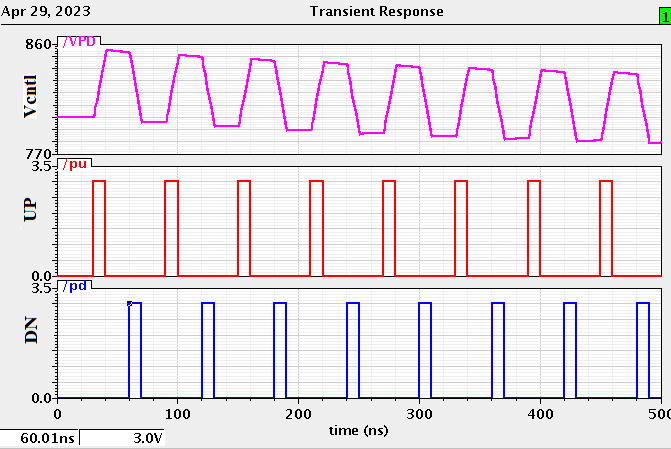


**Figure 11: Simulations of Loop Filter**







# **8.Voltage Controlled Oscillator**
We propose to design and develop a high-performance Voltage Controlled Oscillator (VCO) capable of generating frequencies in the range of 180MHz to 220MHz from 600mV to 1V. This VCO will offer superior performance in terms of frequency stability, phase noise, and tuning range. The proposed VCO will find applications in various wireless communication systems, radar systems, and other RF/microwave systems where precise frequency generation is critical.
In addition to meeting the frequency range requirements, the proposed VCO will also aim to achieve low phase noise performance, which is crucial for many RF/microwave applications. Careful consideration will be given to minimize the impact of noise sources and optimize the design to achieve excellent phase noise performance. The VCO will be characterized extensively for its performance, including frequency stability, phase noise, tuning range, power consumption, and temperature stability.

The proposed VCO will be designed with scalability in mind, making it adaptable for integration into various RF/microwave systems. The design will be compatible with standard semiconductor fabrication processes, enabling ease of manufacturing and scalability for volume production. The proposed VCO will be tested and verified using industry-standard measurement equipment and techniques to ensure its performance meets or exceeds the desired specifications.

In summary, our proposal aims to design and develop a high-performance Voltage Controlled Oscillator (VCO) capable of generating frequencies in the range of 180MHz to 220MHz, with superior performance in terms of frequency stability, phase noise, and tuning range. The proposed VCO will be designed using advanced semiconductor technologies, optimized topologies, and precise voltage control mechanisms. The design will be scalable, manufacturable, and thoroughly characterized for performance. We are confident that our proposed VCO design will meet the requirements and expectations of the project, and we look forward to the opportunity to bring this innovative solution to fruition.

Kosc for the VCO is given as

$K_{osc} = \frac{{f_{\text{max}} - f_{\text{min}}}}{{V_{\text{max}} - V_{\text{min}}}}$

### **8.1 Single Delay Cell**

The delay cell shown in Figure 12 consists of an input NMOS pair M5 & M6 and a PMOS positive feedback pair M3 & M2, which helps to maintain a large oscillation amplitude at higher frequencies. In this design, the frequency tuning is obtained by tuning the conductance of the diode-connected PMOS load M1 & M4. This conductance can be controlled by changing the bias voltage of PMOS transistor M0. The delay line can be enabled or disabled by applying a control signal (high or low) at the gate of transistor M7 [5].

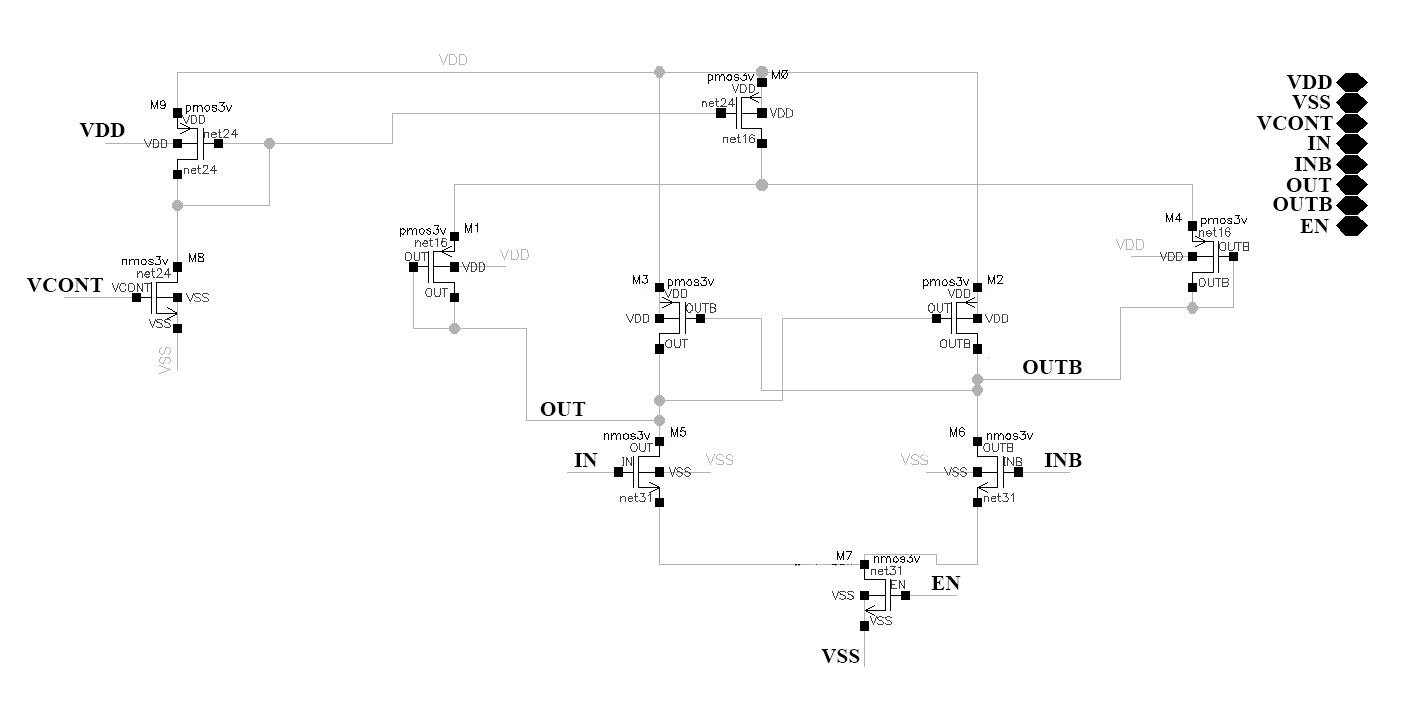

**Figure 12: Delay Cell VCO**


### **8.2 VCO Schematics**

Figure 13 shows the schematic diagram of the Voltage Controlled Oscillator. It consists of 3 stage chain of Delay Cells & Inverters. Three-stage buffers are connected at OUT & OUTB for better output waveform.


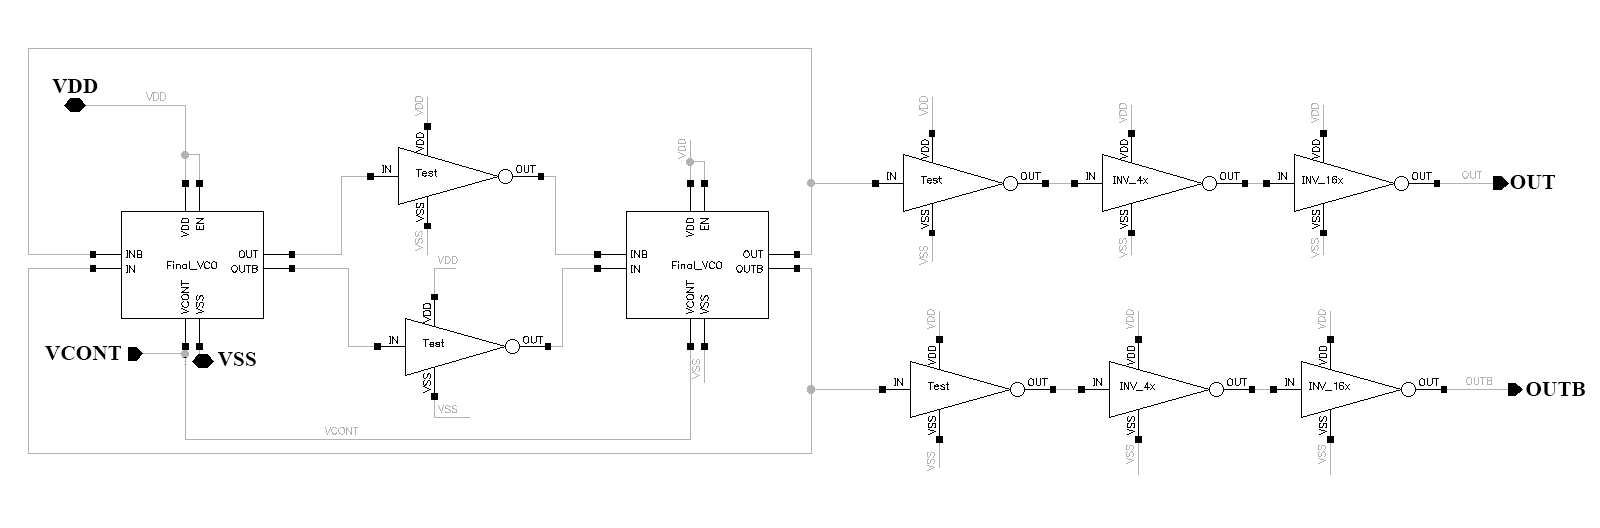

**Figure 13: Schematics Voltage Controlled Oscillator**


### **8.3 Simulations VCO**

Figure 14 shows the transient analysis of VCO. The period for the output clock is 4.981 ns with a 50% duty cycle. So, the output frequency of 200.7 MHz is achieved at the Voltage "vcnt" of 800mV.

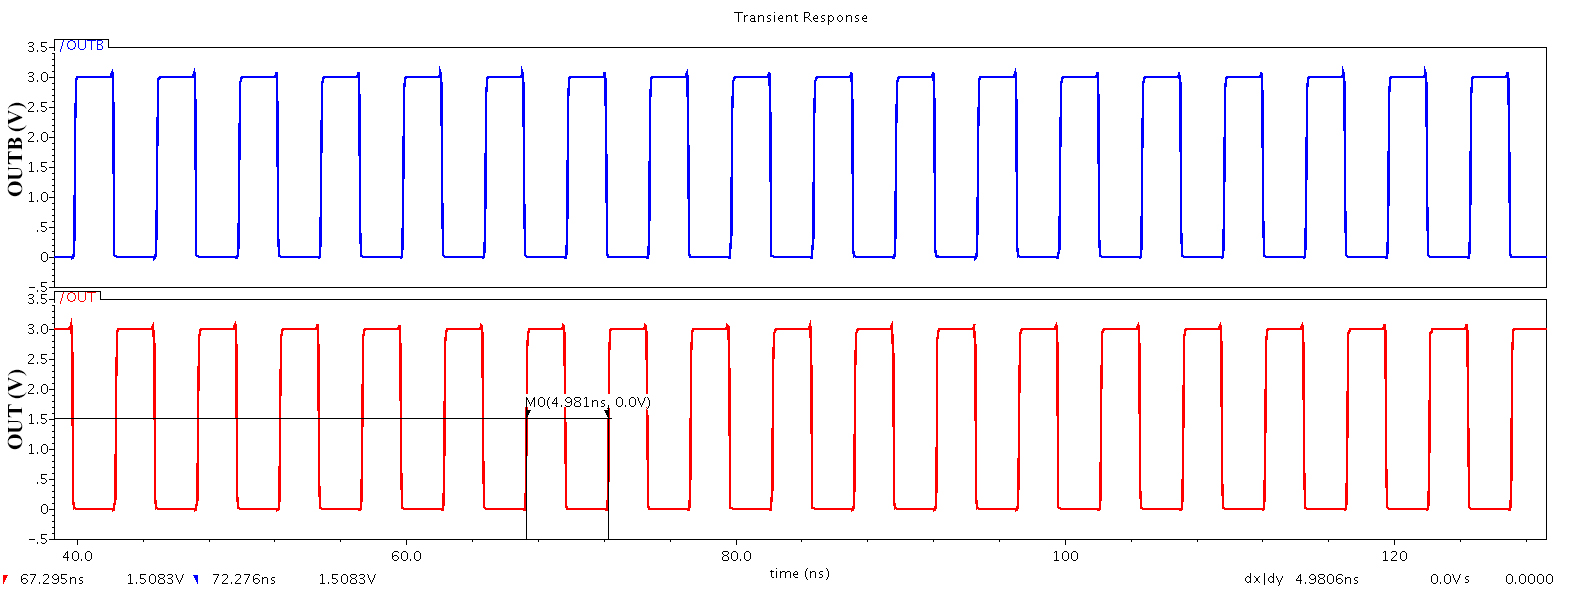

**Figure 14: Transient Response VCO**

### **8.4 Phase Noise**

Figure 15 shows the Phase Noise of VCO at the beat frequency of 200 Mhz. Phase noise is observed following.

**Table 3: Phase Noise at Different Frequencies**

Phase Noise dBc/Hz  |	@ Frequency|
--------------------|------------|
-21.88	            | 1.0 KHz    |
-52.05              |	10 KHz     |
-81.21            	| 10 KHz     |
-105.9	            | 1.0 MHz    |


VCO_PhaseNoise.png

**Figure 15: Phase Noise VCO**

### **8.5 Jitter Analysis**

Jitter is one of the most important parameters of Voltage Controlled Oscillators. As shown in Figure 16, the Jitter of our proposed design is about 440fs.
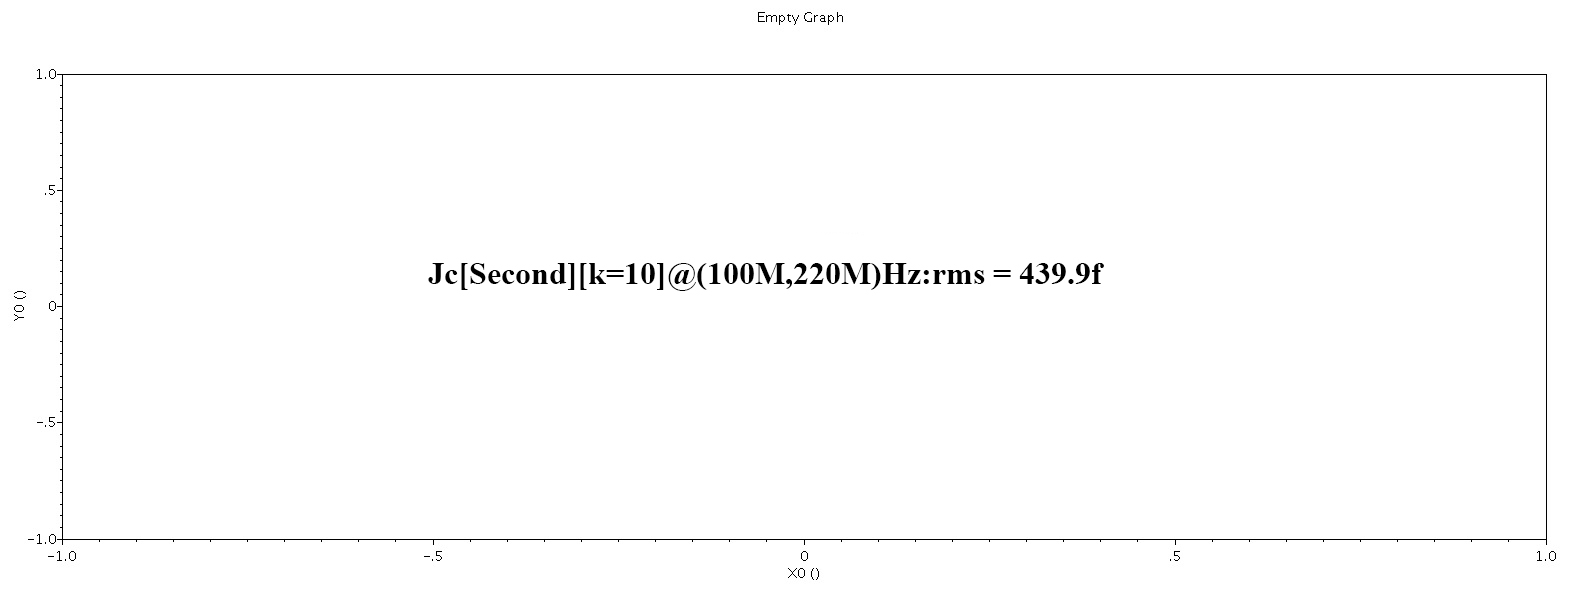

**Figure 16: Jitter Analysis VCO**

### **8.6  Tunability with Respect to VCNTL**

The tuning range of an oscillator is mainly dependent upon the ratio of the transconductance of the input pair M6 & M5 and positive feedback pair M3 & M2. However, the tuning range must be linear but, in this case, it is not perfectly linear we will further work on this to make it perfectly linear.




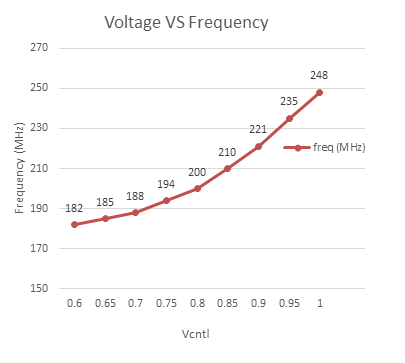


**Figure 17: Frequency vs VCNTL**













# **9. Clock Divider**
A clock divider is a key component in a phase-locked loop (PLL), which is a feedback control system that generates an output signal with a frequency that is a multiple of a reference input signal. The PLL uses a voltage-controlled oscillator (VCO) to produce the output signal, and the clock divider is used to divide the output signal frequency by a certain factor to generate a feedback signal that is compared to the reference input signal to adjust the VCO frequency.

The clock divider is typically a binary counter that counts the output signal edges and generates a pulse when the counter reaches a certain value, which is determined by the desired division factor. The pulse is used as the feedback signal to adjust the VCO frequency, which is achieved by changing the voltage applied to the VCO input.
For example, if the desired output frequency is 200 MHz and the reference input frequency is 20 MHz, the clock divider needs to divide the output frequency by a factor of 10. In this case, the clock divider needs to count 10 output signal edges and generate a pulse on the 11th edge to adjust the VCO frequency.

The clock divider is a critical component in the PLL design, as it determines the resolution and stability of the feedback loop. A higher division factor provides better resolution but lower stability, while a lower division factor provides better stability but lower resolution. The choice of division factor depends on the specific application requirements and the characteristics of the VCO and other components in the PLL.

A tunable clock divider is a clock divider that allows for the division factor to be changed dynamically. This is useful in applications where the output frequency needs to be adjusted over a wide range, such as in communication systems, where the channel bandwidth can vary depending on the signal conditions.

A tunable clock divider can be implemented using a programmable counter or a fractional-N divider. A programmable counter allows for the division factor to be set to a specific integer value, which can be changed by updating the counter value. This provides coarse control over the output frequency but does not allow for fine-tuning.
A fractional-N divider, on the other hand, allows for the division factor to be set to a fractional value, which can be changed dynamically by adjusting the frequency of the reference input signal. This provides finer control over the output frequency but requires more complex circuitry and can introduce phase noise and spurs. It also does not have a 50% duty cycle.

One approach to implementing a tunable clock divider is to use a voltage-controlled oscillator (VCO) with a wide tuning range, and a phase-frequency detector (PFD) that compares the output frequency with a reference frequency and generates a control signal to adjust the VCO frequency. The PFD output is then fed to a programmable counter or a fractional-N divider to generate the output clock signal with the desired division factor.

Tunable clock dividers are widely used in modern communication systems, such as Wi-Fi, Bluetooth, and cellular networks, where the need for dynamic frequency tuning is essential to maintain high data rates and reliable connectivity.



$H(s) = \frac{1}{N}$


Basically, we have designed tunable PLL which changes its output frequency by (+-10%). For comparison with Vref, we needed tunable clock dividers. We made multiple clock dividers which are multiplexed and activate the required clock divider according to the transient state of the system. 3 dividers are attached below, rest of the dividers are not attached but the given table provides the required data about them.

### **9.1 Clock Division by 10**

Figure 18, shows the decade-based counter for clock divided by 10. The circuitry at the left is to make the duty cycle of the clock 50%.

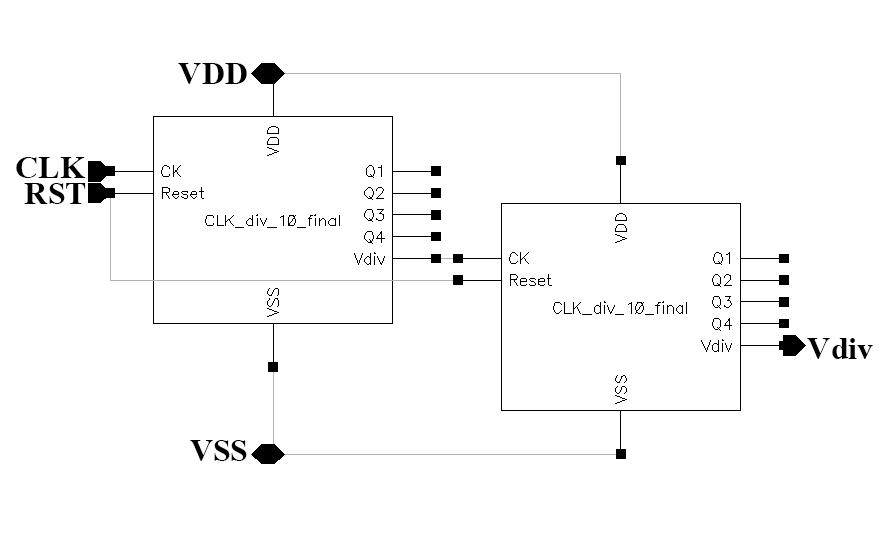

**Figure 18: Divider of 10**

### **9.2 Clock Division by 100**
Figure 19, shows the clock division by 100 which is achieved by connecting the two clock dividers in series. Output of the first divider is divided by 10 which is the input of the second divider. The second divider divides it by 10 which makes it division by 100

                         10 x 10 = 100


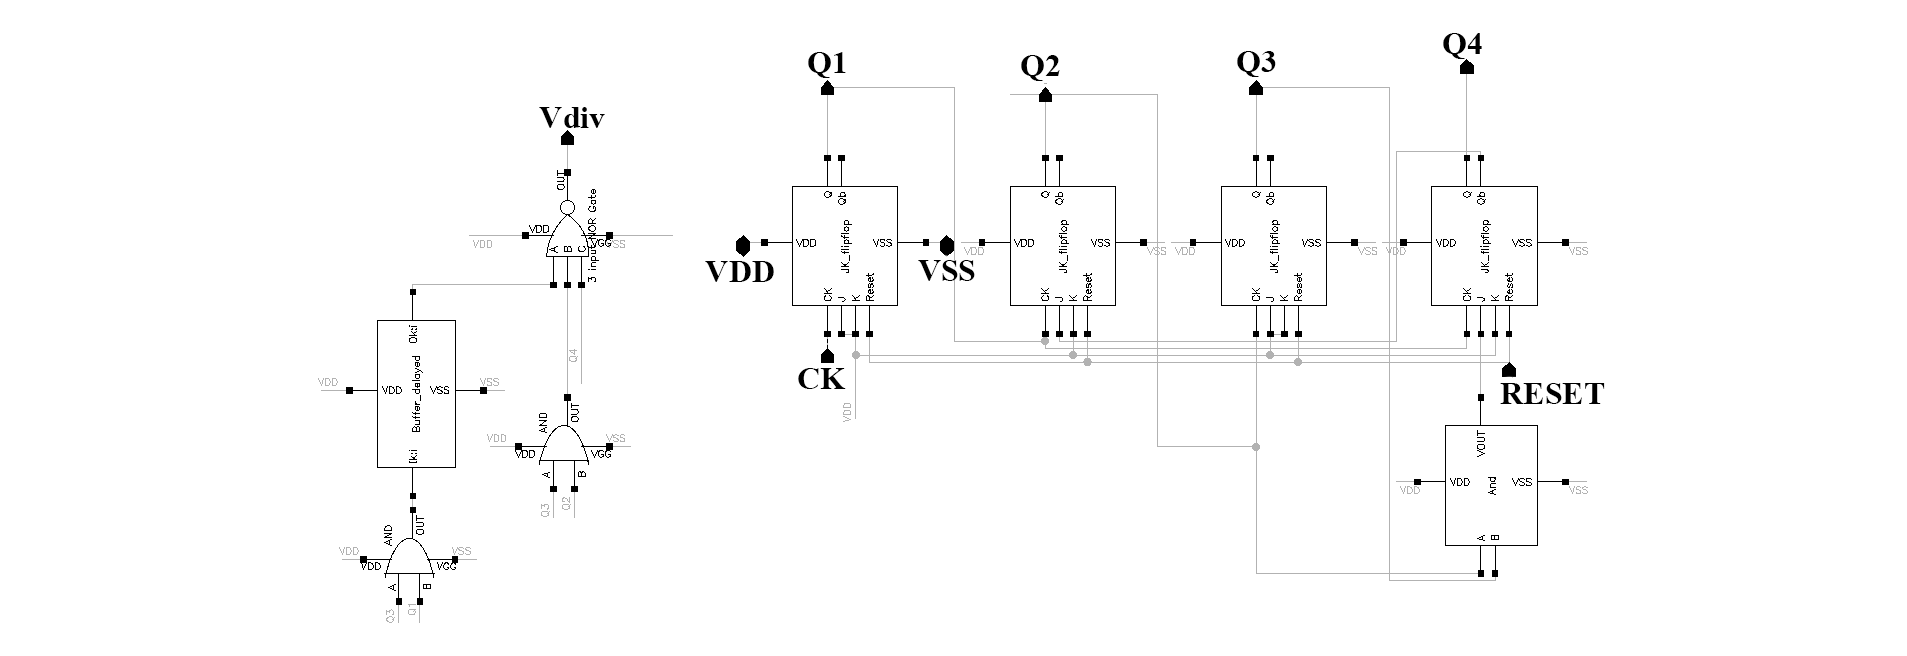
**Figure 19: Schematics Divider of 100**


### **9.3 Simulation Division by 100**

Figure 20 shows the simulation of the clock division by 100. The operating frequency is 2MHz, so correspondingly the clock period is 0.5us. After division by 100, the clock period should be 50us which is demonstrated by the above figure.

                     0.5 x 100 = 50

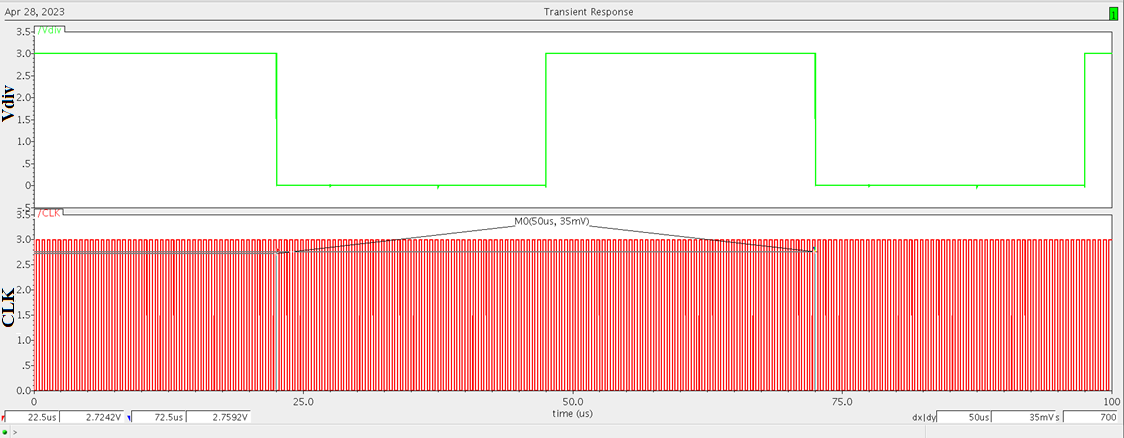

**Figure 20: Simulations Divider of 100**

### **9.4 Clock Division by 11**

Figure 21 shows the counter-based clock divider by 11. The circuitry attached at the right is to make the duty cycle of the clock 50%.

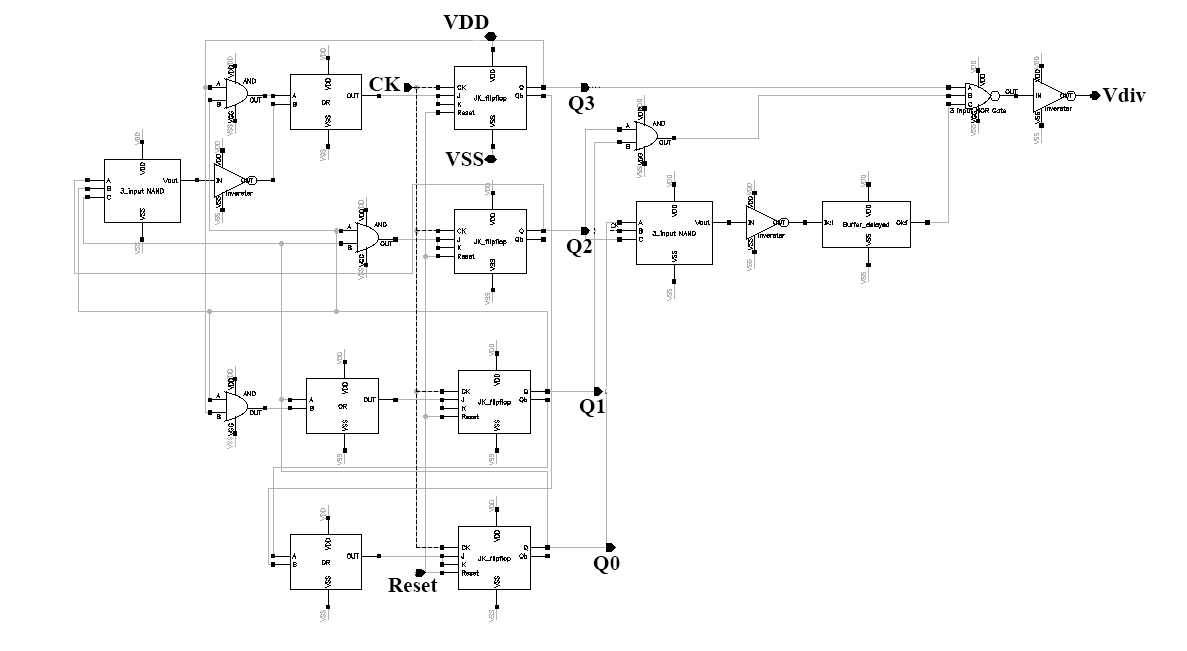

**Figure 21: Divider of 11**

### **9.5 Clock Division by 110**

Figure 22 shows the clock division by 110 which is achieved by connecting the two clock dividers in series. Output of the first divider is divided by 11 which is the input of the second divider. The second divider divides it by 10 which makes it division by 110.

                       10 x 11 = 110

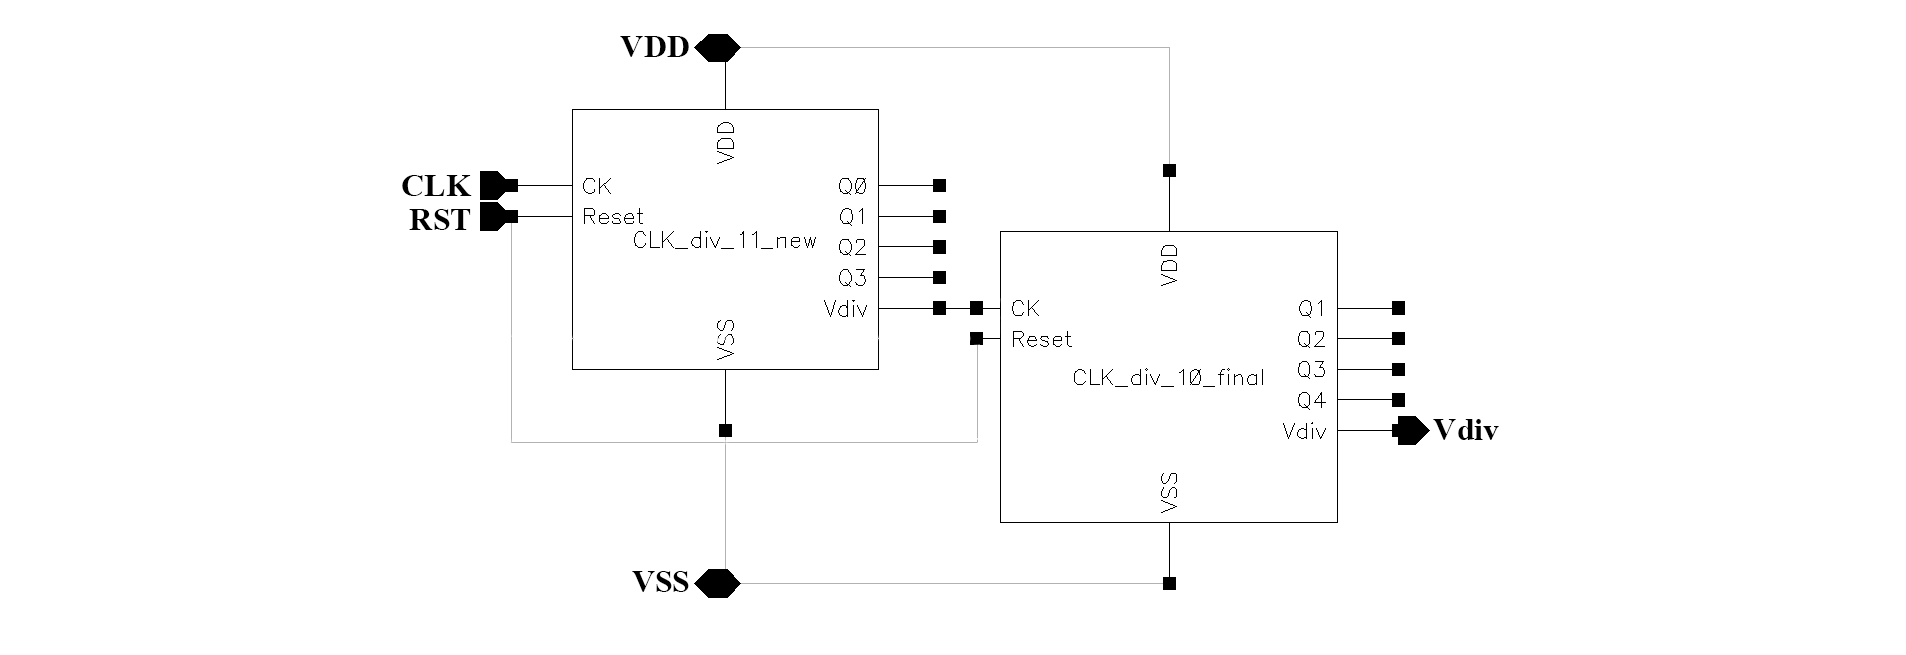

**Figure 22: Schematics Divider of 110**

### **9.6  Simulation Division by 110**

Figure 23 shows the simulation of the clock division by 110. The operating frequency is 2MHz, so correspondingly the clock period is 0.5us. After division by 110, the clock period should be 55us which is demonstrated by the above figure.

                         0.5 x 110 = 55

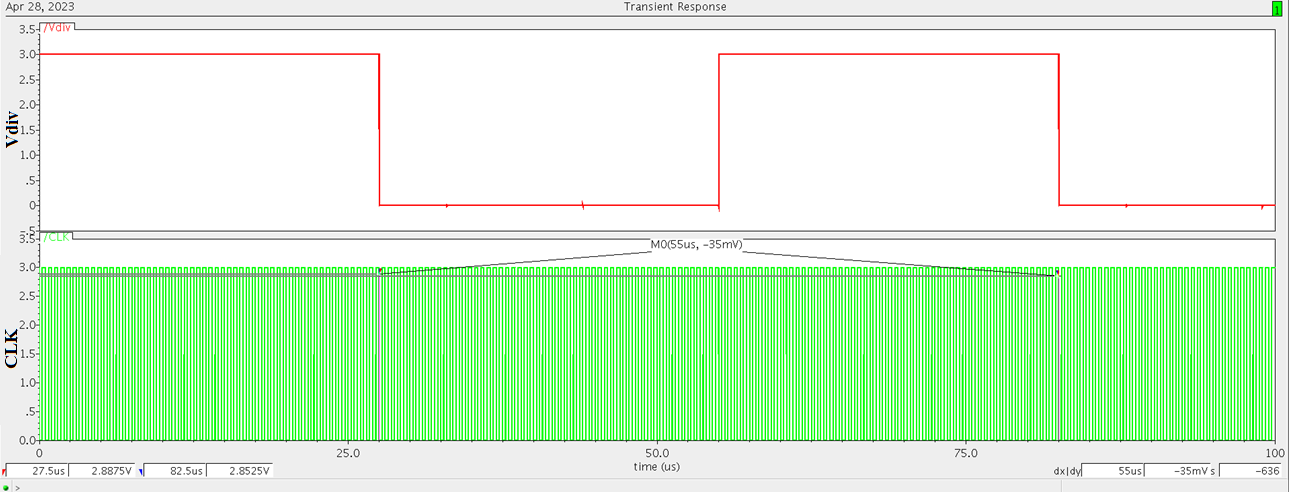

**Figure 23: Simulations Divider of 110**

### **9.7 Clock Division by 3**

Figure 24 shows the counter-based clock divider by 3. The circuitry attached at the right is to make the duty cycle of the clock 50%.

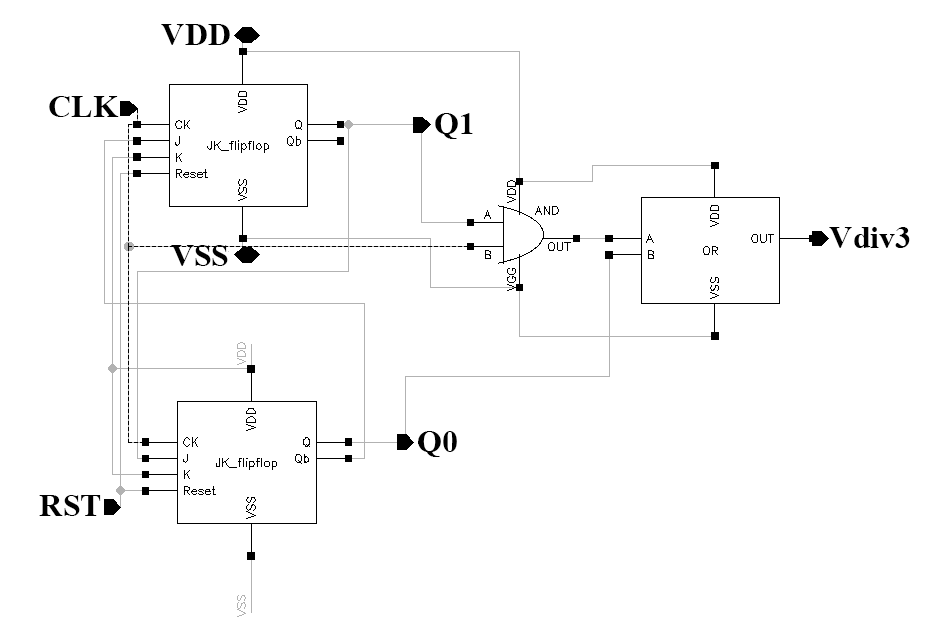

**Figure 24: Divider of 3**

### **9.8 Clock Division by 90**

Figure 25 shows the clock division by 90 which is achieved by connecting the three clock dividers in series. Output of the first divider is divided by 3 which is the input of the second divider. The second divider gives output after further dividing it by 3. The third divider divides it by 10 which makes it division by 90.

                     3 x 3 x 10 = 90
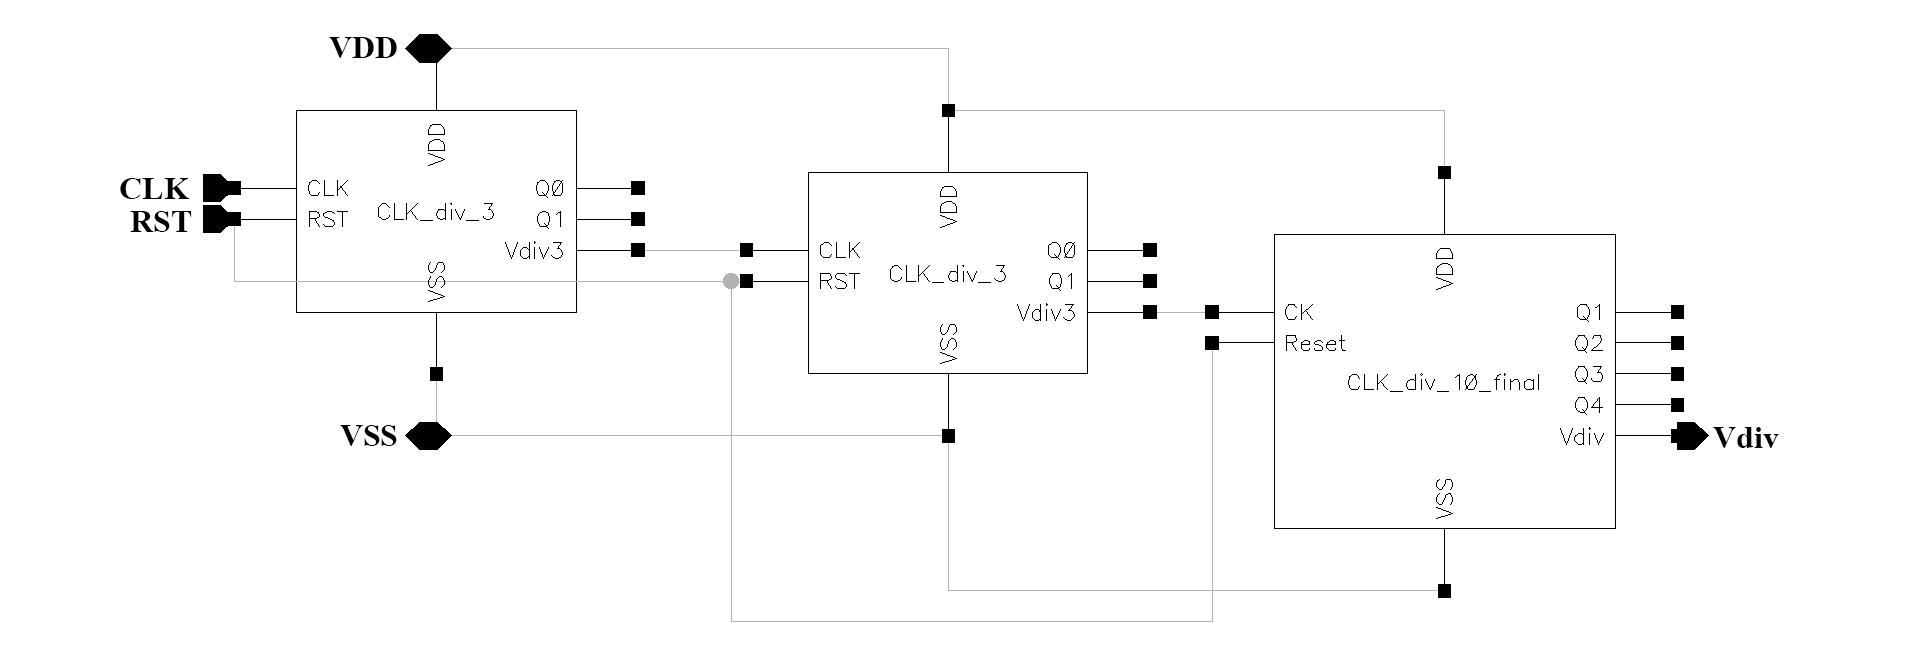

**Figure 25: Schematics Divider of 90**

###  **9.9 Simulation Division by 90**

Figure 26 shows the simulation of the clock division by 90. The operating frequency is 2MHz, so correspondingly the clock period is 0.5us. After division by 90, the clock period should be 45us which is demonstrated by the above figure.

                            0.5 x 90 = 45

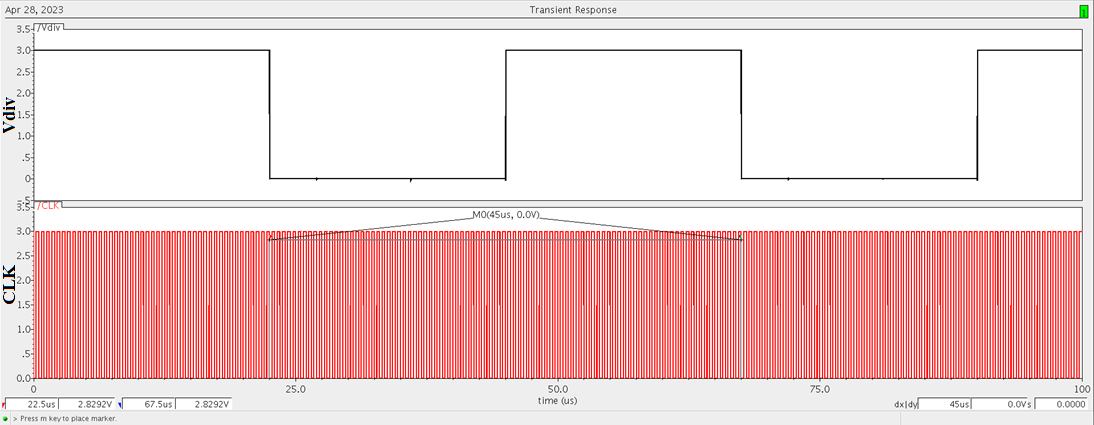

**Figure 26: Simulations Divider of 90**


### **9.10 Mux for Multiple Clock Dividers**

Figure 27 shows the 8x1 multiplexer which allows one clock at the output depending on the selection bit. It is then used in the schematic of the multiple clock divider where it plays a significant role in the selection of the clock.


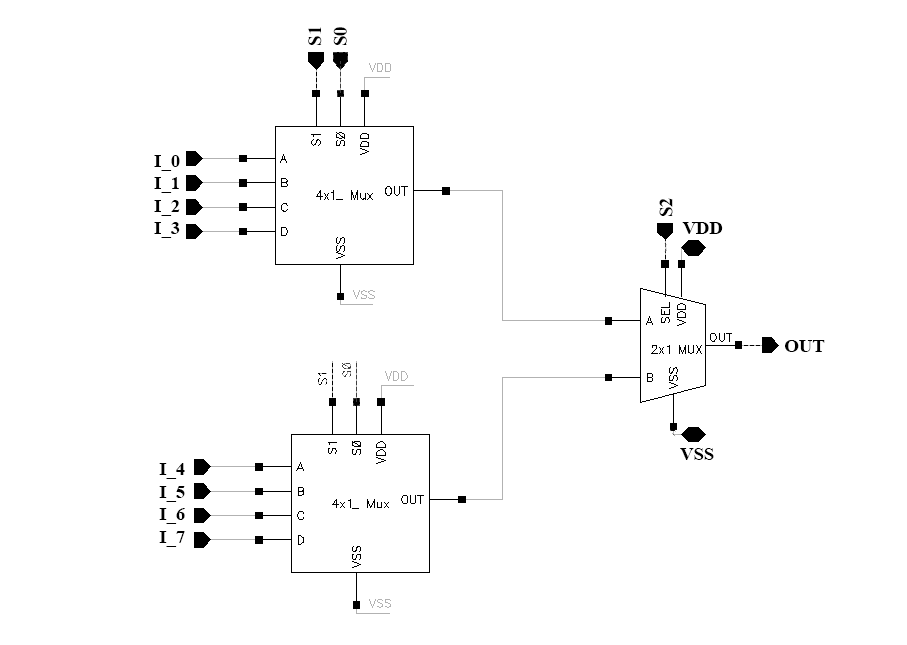

**Figure 27: 8x1 Mux**


### **9.11 Multiple Clock Dividers**

Figure 28 shows the multiple clock divider schematic which allows one clock at the output depending on the selection bit. It is a tunable clock divider which plays a significant role in tunable PLL. 3 different clock dividers are attached above which are at extreme values, similarly there are some other dividers dividing at the intermediate values given in the below diagram. There are multiple clock dividers connected to the input of the mux; depending on the output of the VCO, the dividing factor is decided and connected. The plan is to extend this multiplexer to a 16x1 multiplexer and provide some more clock dividers which will provide better control over frequency and improve tunability. Due to time constraint, it is not done yet, but we will submit this in the next submission.


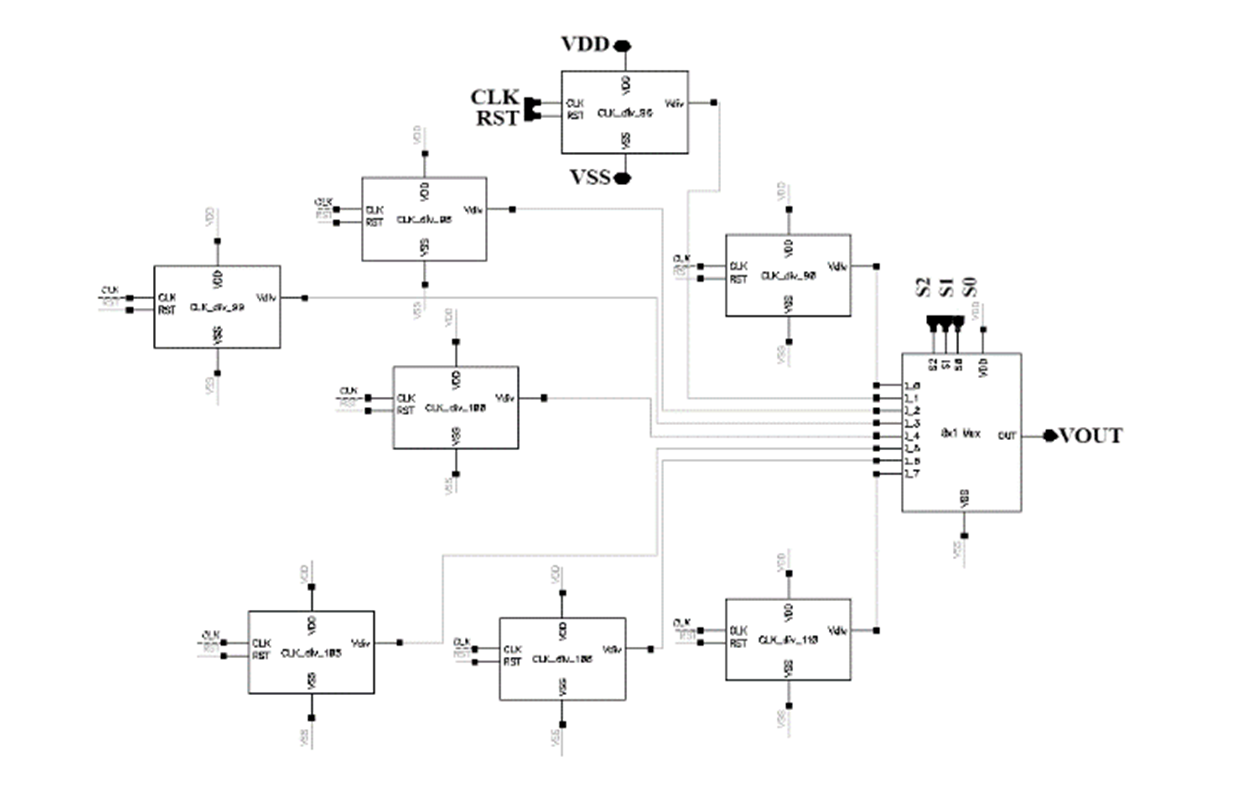



**Figure 28: Tunable Clock Divider** 


###   **9.12 Clock Division by 2**

Figure 29 shows the D flipflop based clock divider by 2. It is attached to the output of the VCO to equalize the duty cycle of both levels if not same. The frequency of the VCO is 200MHz but after this divider, the frequency will be 100MHz. So, this VCO basically provide 3 clocks, 2 differential clocks at 200 MHz and one at 100MHz.

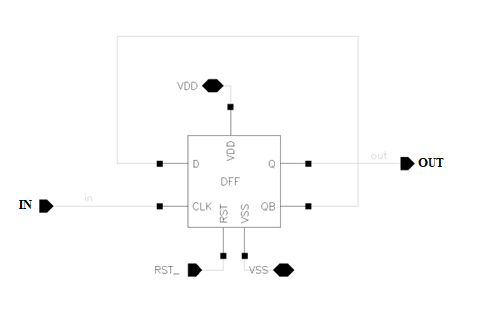

**Figure 29: Schematics Divider by 2**








# **10. PLL Integration**

Integrating all sub-blocks of PLL such as Phase Detector, Loop Filter, Voltage Controlled Oscillator and Clock Dividers. Then the overall transfer function of the PLL is calculated as

The open loop transfer function is given as 

$G(s) = K_{PD} \cdot Z(s)  \cdot \frac{K_{OSC}}{s}$


And according to feedback theory the closed loop transfer function is given as

$T(s) = \frac{G(s)}{1 + H(s) \cdot G(s)}$

$T(s) = [\frac{{K_{PD} \cdot (1+R \cdot C_2 \cdot s) \cdot K_{OSC}}}{{s \cdot \{(C_1+C_2)s + R \cdot C_1 \cdot C_2 \cdot s^2\}}}] \left/ \left[ 1 + \frac{{K_{PD} \cdot (1+R \cdot C_2 \cdot s) \cdot K_{OSC}}}{{(C_1+C_2)s + R \cdot C_1 \cdot C_2 \cdot s^2}} \cdot \frac{1}{{Ns}} \right] \right.$
.

### **10.1 Schematics for the PLL is**

Figure 30, shows the implementation of PLL and combining all the sub-blocks, “VREF” and “VDIV” are fed into the Phase Detector, the output of Phase Detector “pu” and “pd” are fed to Charge Pump and Loop Filter, its output “vcnt” is fed to the VCO, and VCO gives the differential outputs (for ADC) “CLK_2” and “CLK_2B”, followed by a Divider of 2 to provide clock CLK_1 (for DAC).  Mux followed by the different dividers gives the “VDIV”.


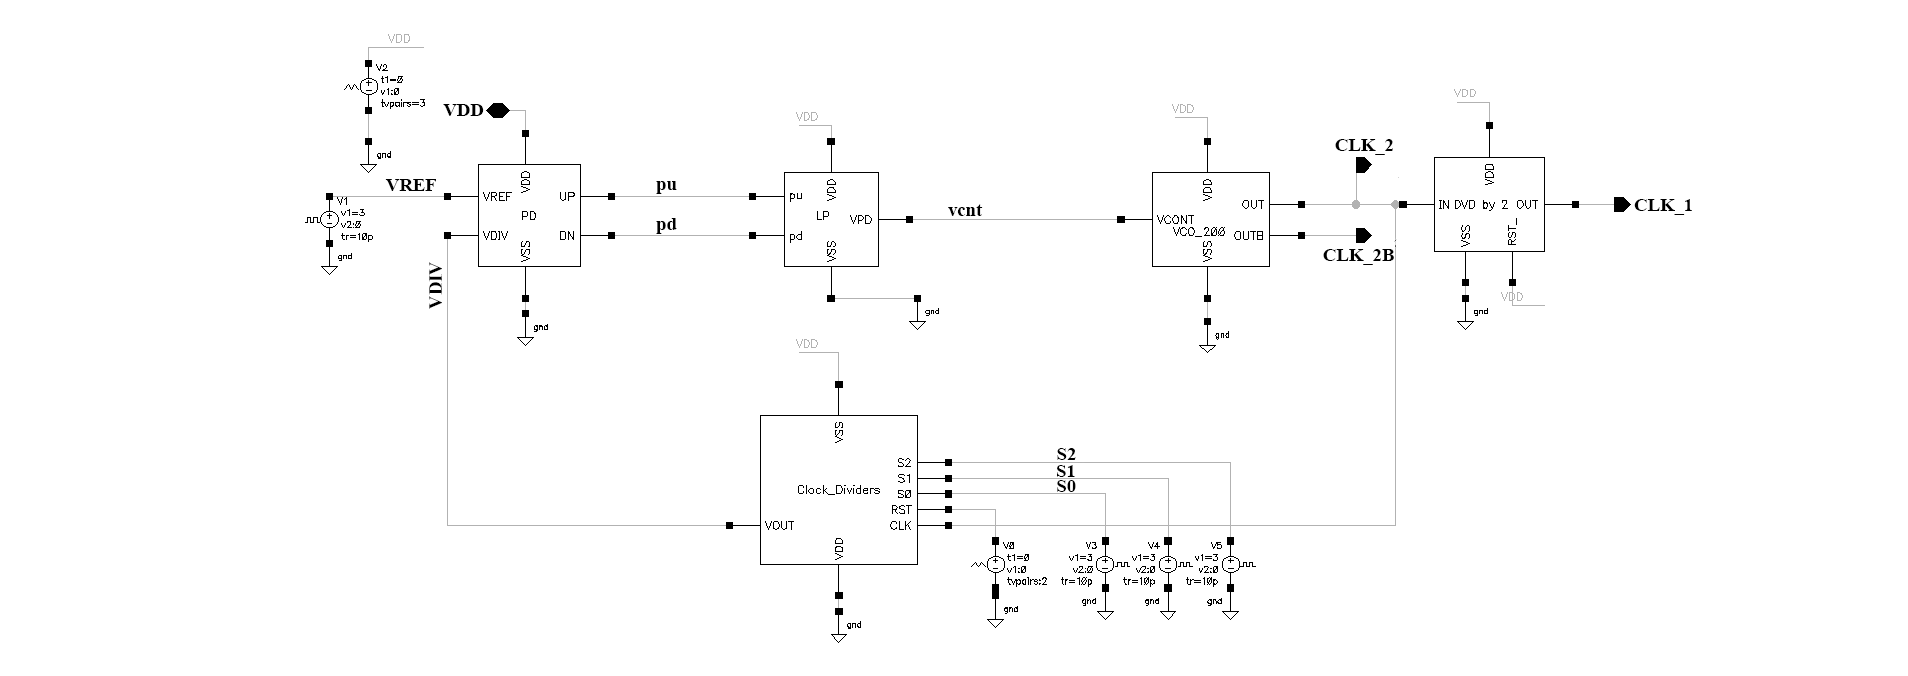

**Figure 30: Schematics PLL**


### **10.2 Simulations PLL**

The above PLL is simulated for 20 us. And obtained the following results shown in the Figure 31 (a),  VREF” of 2 MHz is applied, based of initial values “vcnt = 650mV”, on which “VCO” generated the clock and divider was set to 100. “VDIV” observed lagging the “VREF”, phase detector detects and gave rise to “pd” signal, and rise to “pu” signal depending on the leading or lagging of “VDIV”. After some overshoots and undershoots, at the time of 3.327 us the “vcnt” became approximately stable to the value of 799.6 mV with ±2mV. At 6.592 us the “vcnt” gets very much stable to797mV which is observed at 18.05us is 797mV.

Figure 31 (b) shows the zoomed view of boxed region in Figure 31 (a). Here the reference and divided clock can be observed that these are in phase. The “vcnt” signal is stable. In order to observe the output clock signals “CLK_”1, “CLK_2” and “CLK_2B” the boxed area of Figure 31 is further zoomed which is illustrated in Figure 31 (c). It can be seen that the “vcnt” is at 797mV while “CLK_2” and “CLK_2B” are stable differential clocks of 200 MHz frequency with the logic high value of 3V and logic low value of almost 0 ( 7uV). And “CLK_1” with the frequency of 100 MHz can also be seen that is exactly divided by the factor of 2.


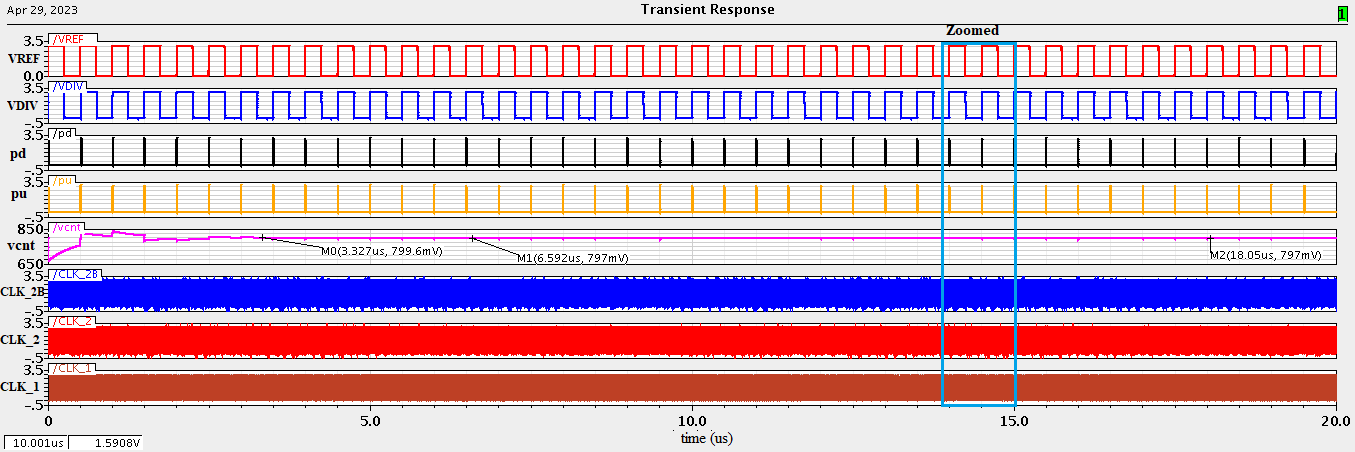


**Figure 31 (a): Simulations PLL**

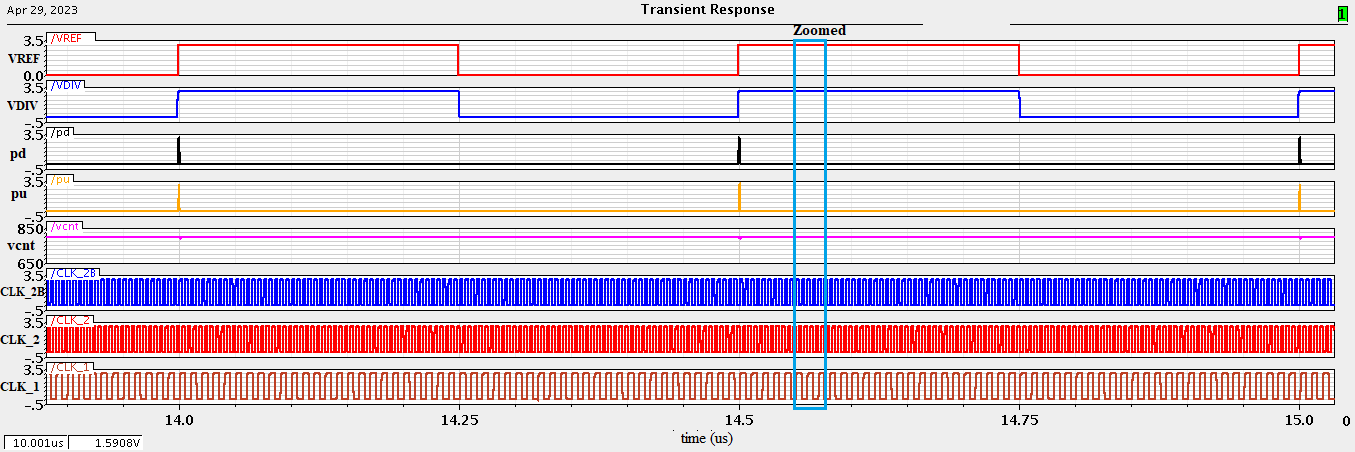

**Figure 31 (b): Simulations PLL Zoomed 1**


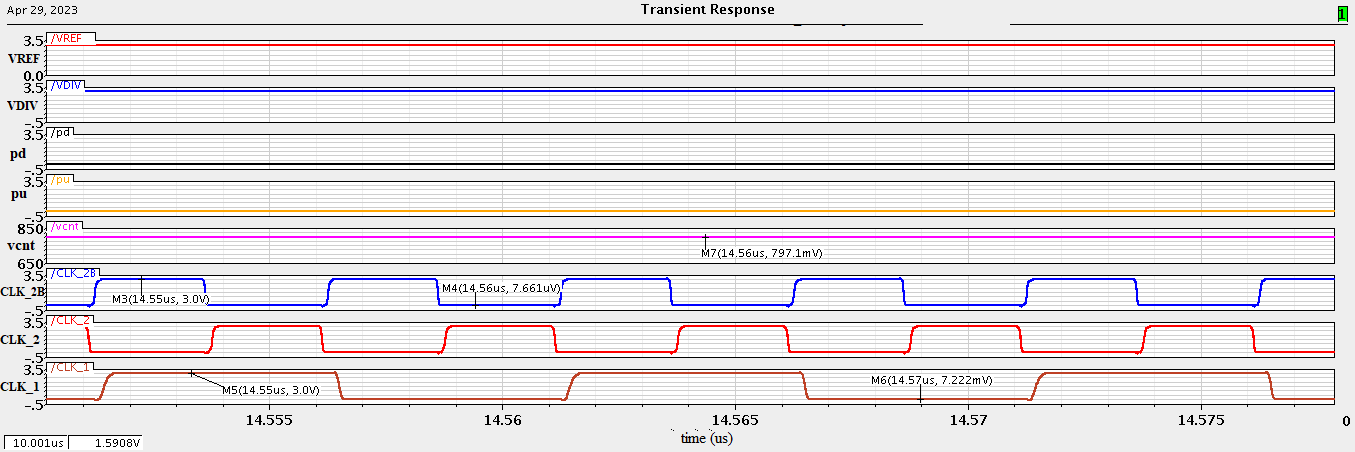


**Figure 31 (c): Simulations PLL Zoomed 2**



# **11. Xschem**
Xschem is an open-source tool for analog and mixed-signal circuit design and simulation. It is a successor to the well-known tool called "Xcircuit" and is designed to provide a flexible and powerful environment for creating and simulating electronic circuits. Xschem offers a user-friendly graphical interface that allows users to draw circuit schematics using a rich library of components such as resistors, capacitors, transistors, and integrated circuits. The tool supports both hierarchical and flat designs, enabling users to organize and manage complex circuitry efficiently.

One of the key features of Xschem is its ability to perform circuit simulation using external simulators such as ngspice or Xyce. It can generate netlists from the circuit schematic and interface with these simulators to perform transient, AC, DC, and noise analyses. This capability allows users to verify the behavior and performance of their analog circuits through simulation. Xschem also supports advanced features like parameterized design, behavioral modeling, and the ability to define custom models and subcircuits. These features enable designers to explore design variations, create reusable circuit blocks, and simulate complex systems with ease. Moreover, Xschem is highly extensible and customizable through the use of Scheme scripting language. Users can write scripts to automate tasks, customize the tool's behavior, and create new functions or utilities to enhance their design workflows.

Overall, Xschem is a versatile and powerful open-source tool for analog and mixed-signal circuit design. Its intuitive interface, simulation capabilities, support for custom models, and extensibility make it a valuable resource for analog designers and researchers.

## **11.1 Porting to Xschem**
We have started working on Xschem. We have made basic schematics and simulated them. Now we are improving our design by adding some features and refining our quality parameters to make this PLL practically more accurate and efficient. There is some work left which is not done in this proposal due to time constraint, but it will be added in the next submission implemented in the open-source tool.

### **11.1.1 Phase Detector Schematic in Xschem**
Figure 32 shows the implementation of the phase detector in Xschem 130nm.

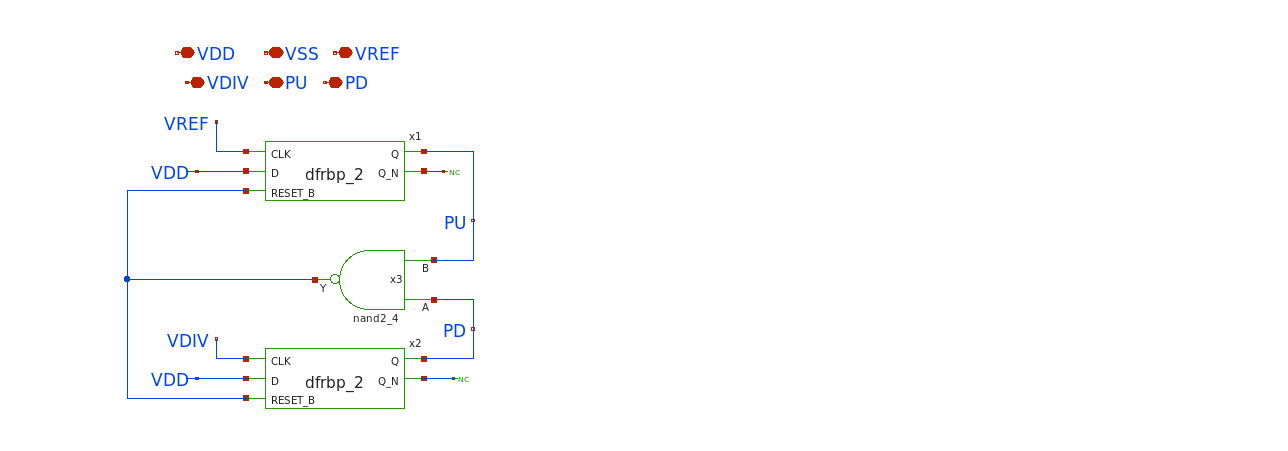

**Figure 32: Phase Detector Schematics in Xschem**



Figure 33 shows the test bench of the phase detector in Xschem 130nm.

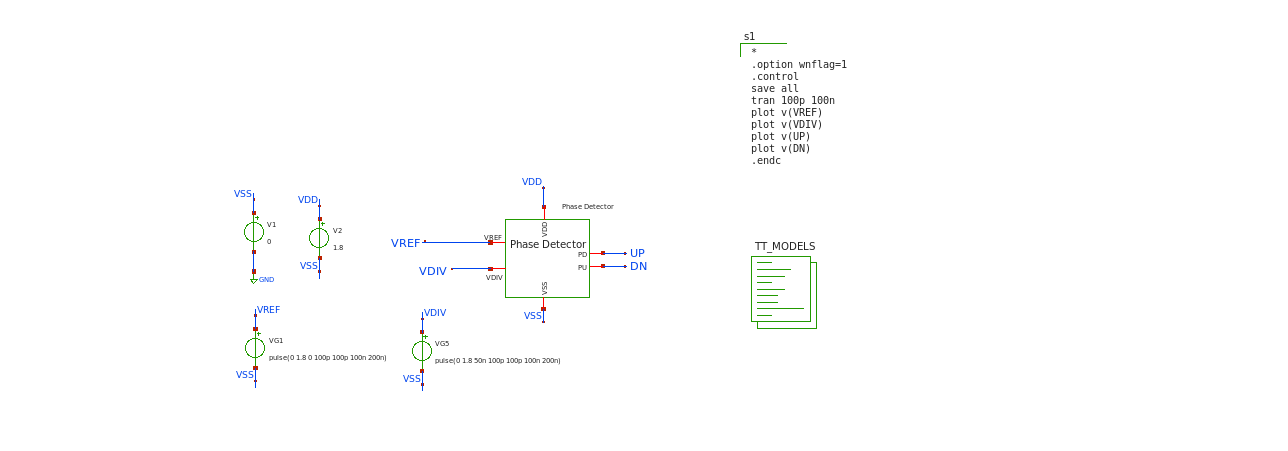





**Figure 33: Phase Detector Schematics in Xschem**

Figure 34 shows the simulations of the phase detector in Xschem 130nm.


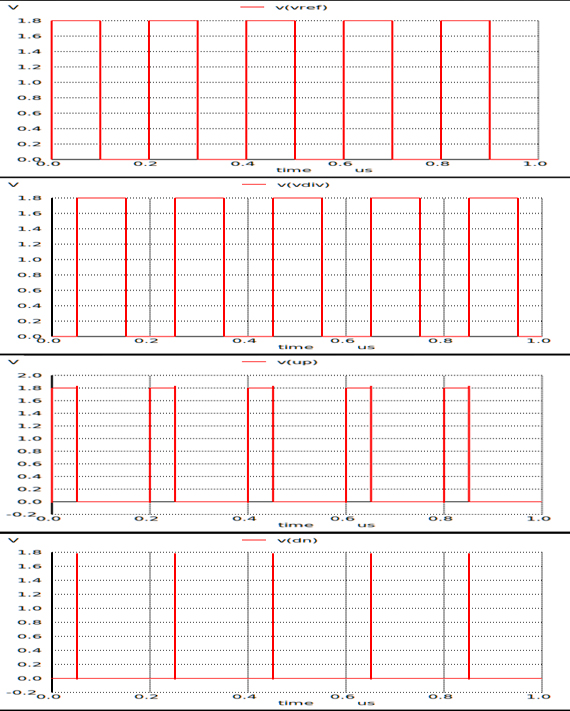



**Figure 34: Phase Detector Simulations in Xschem**





Figure 35 shows the implementation of the single delay cell in Xschem 130nm.



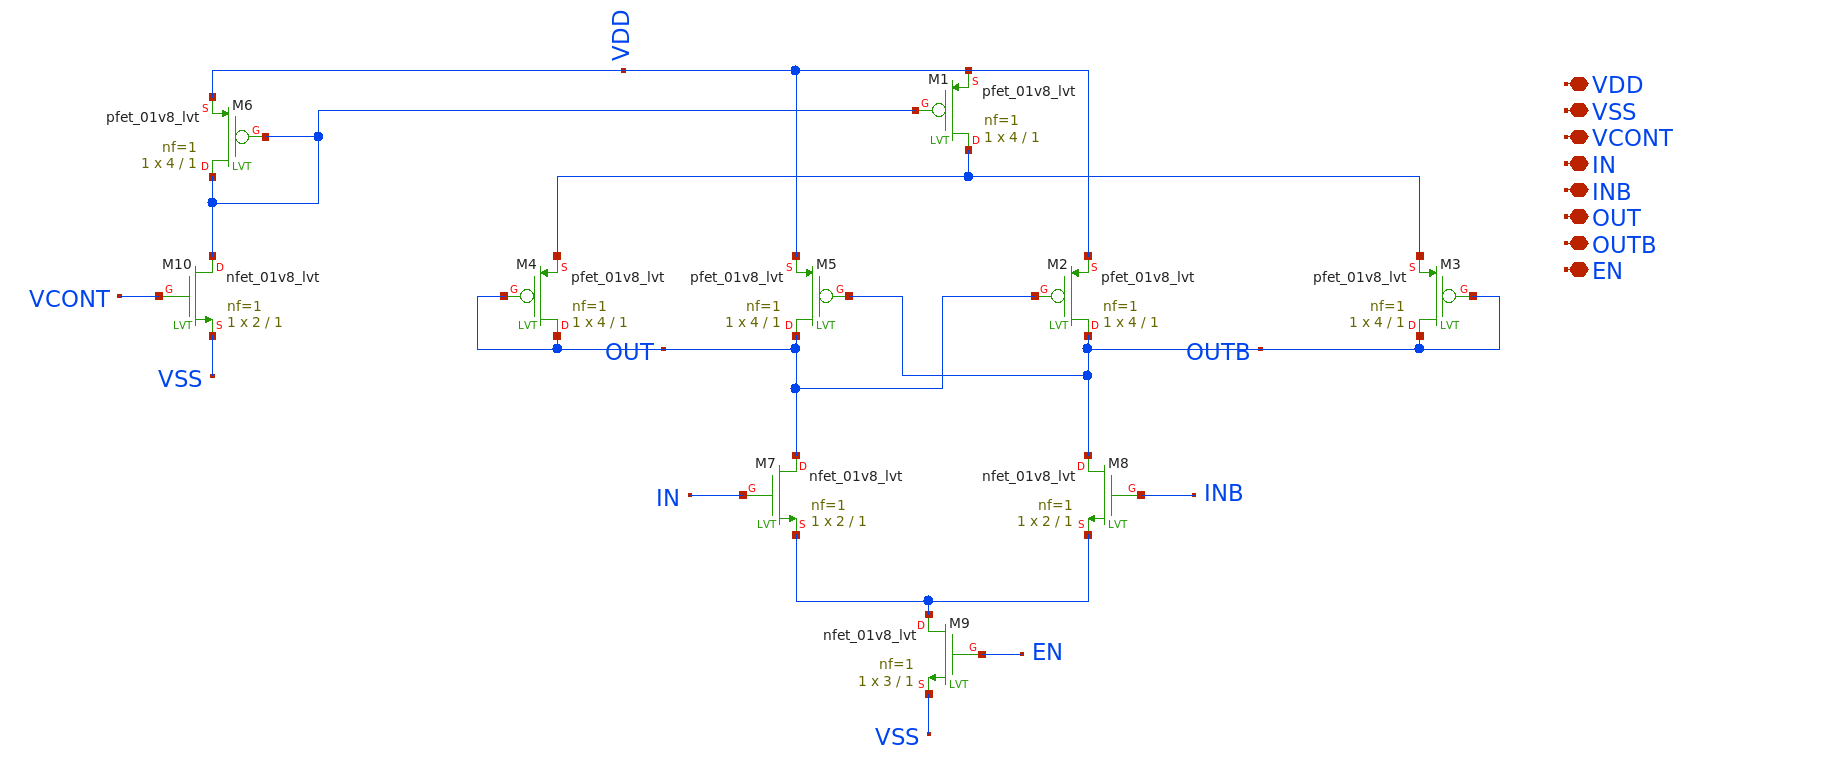



**Figure 35: Single Delay Cell Schematics in Xschem**






Figure 36 shows the implementation of the VCO in Xschem 130nm.


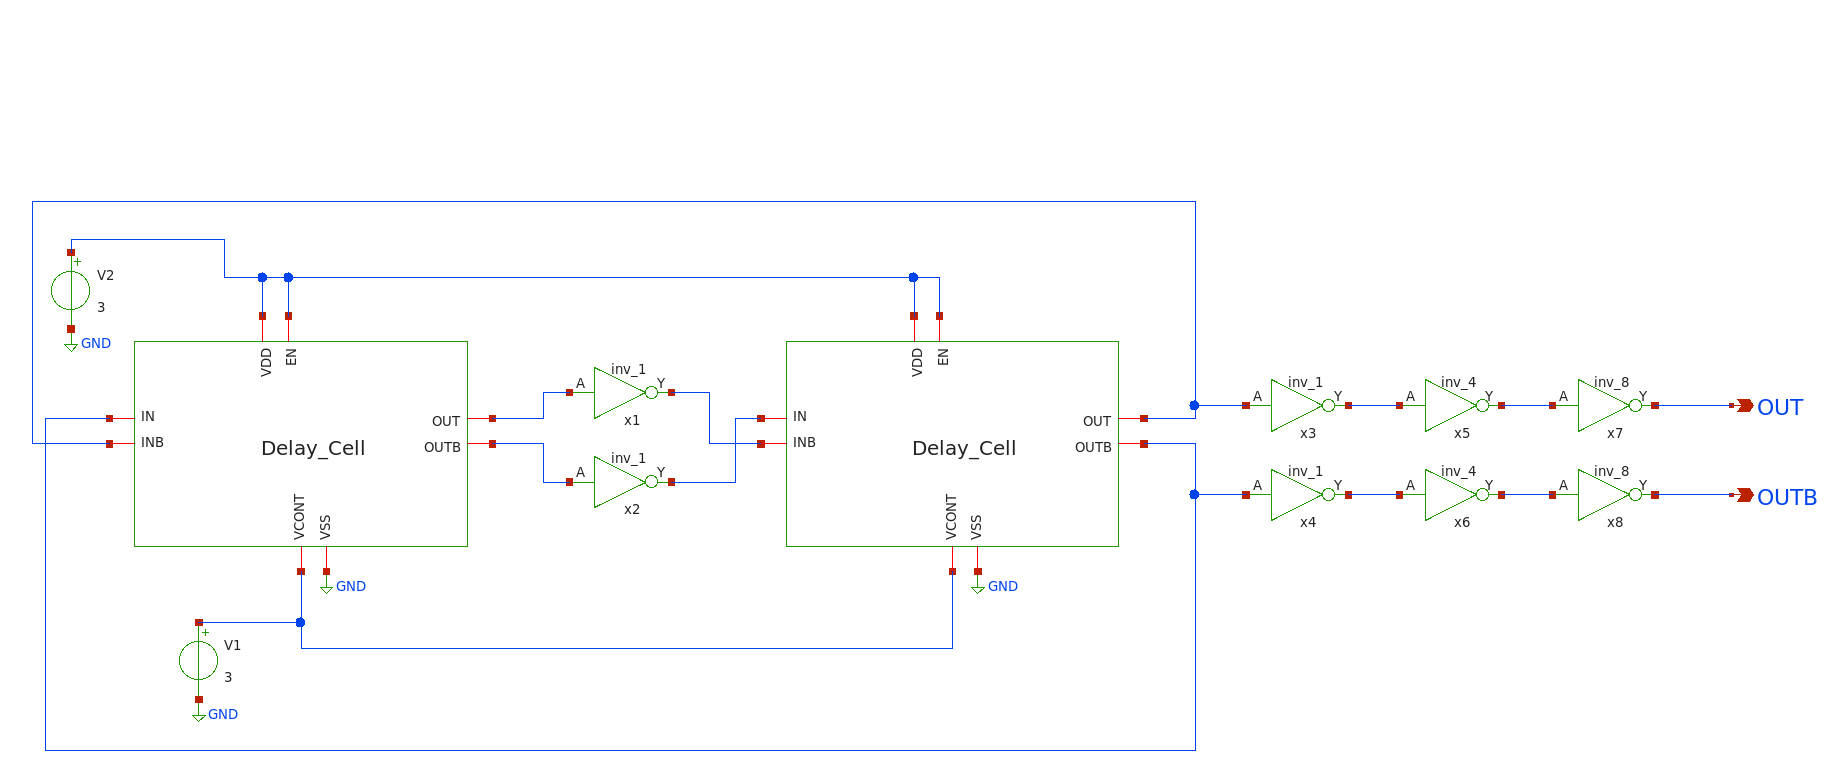




**Figure 36: VCO Schematics in Xschem**





Figure 37 shows the implementation of the clock divider by 10 in Xschem 130nm.

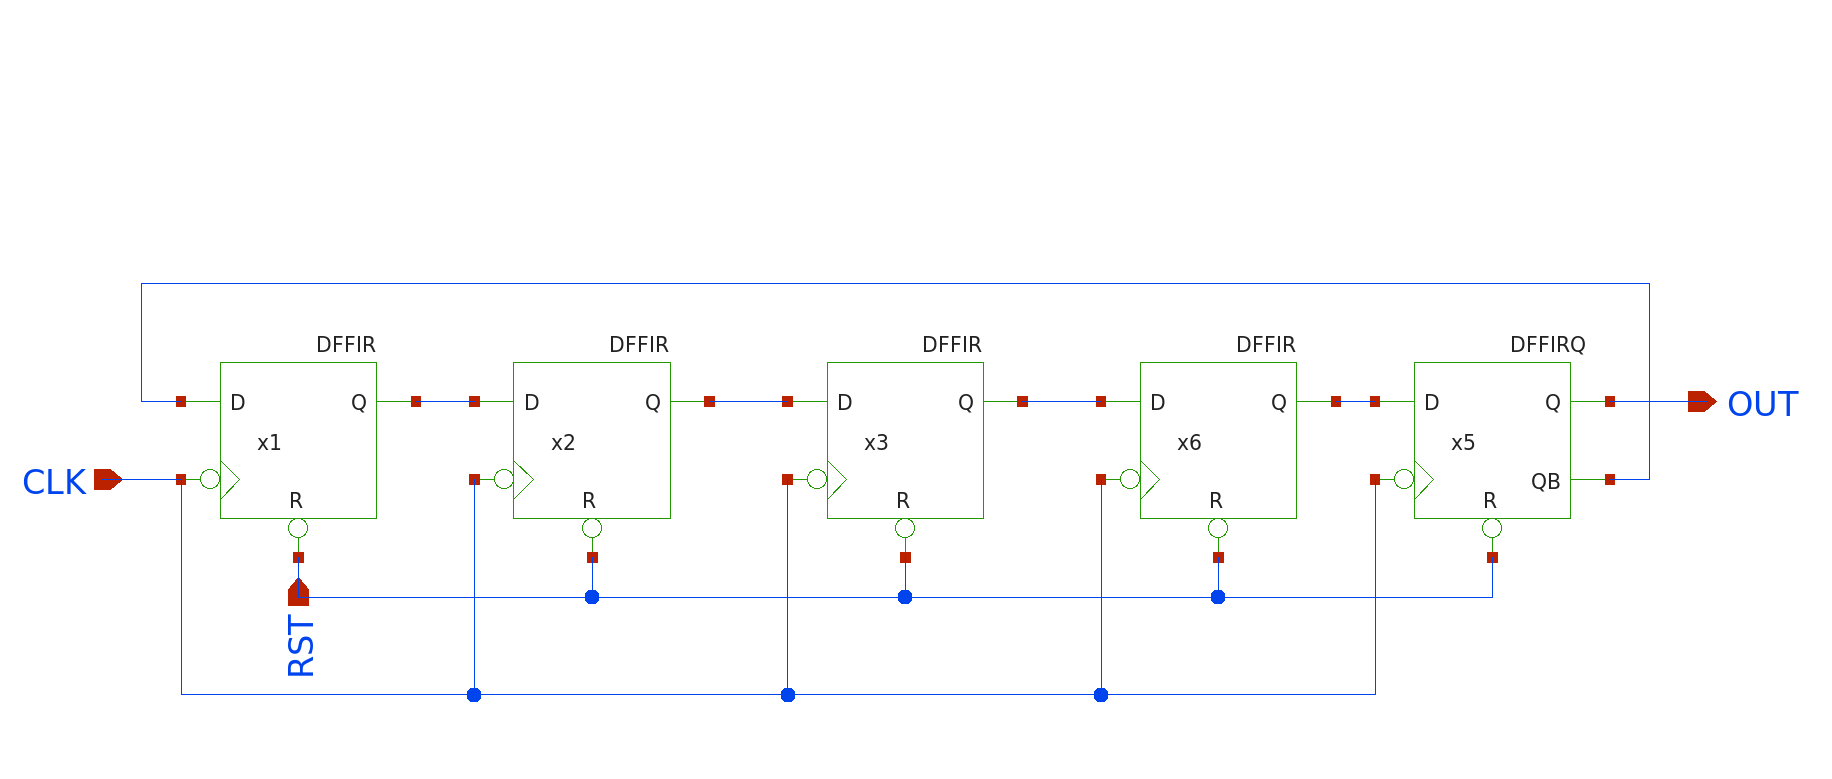





**Figure 37: Clock Divider by 10 Schematics in Xschem**

Figure 38 shows the implementation of the clock divider by 100 in Xschem 130nm.

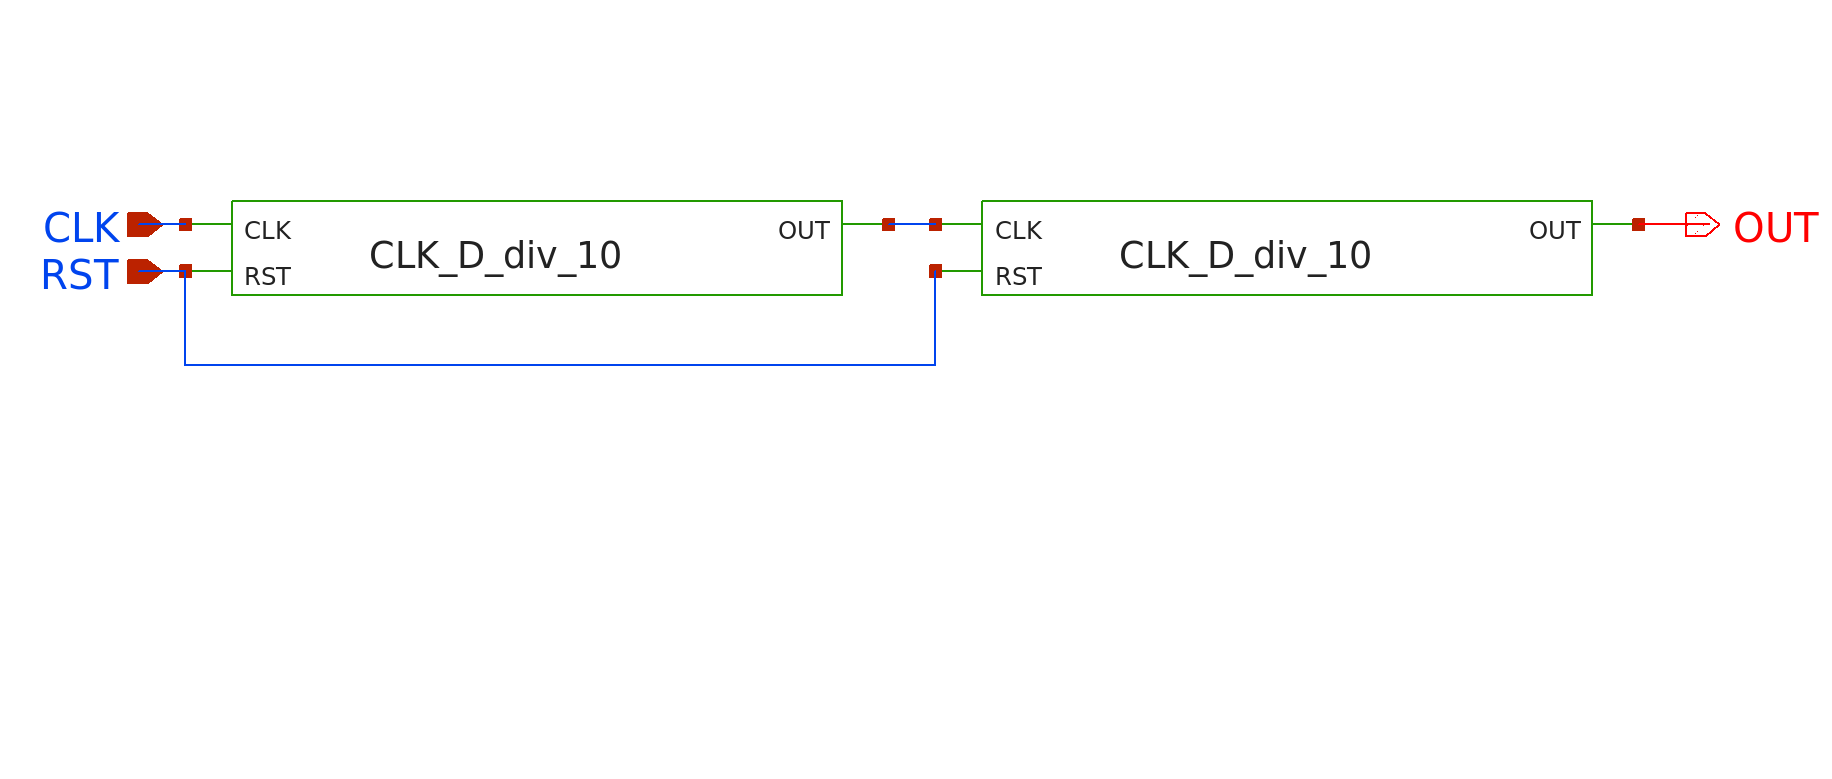




**Figure 38: Clock Divider by 100 Schematics in Xschem**


# **12. Conclusion**

The design and simulation of the Phase-Locked Loop (PLL) in 130nm technology, utilizing Cadence Virtuoso and Openlane Xschem, is demonstrated with promising results. The PLL exhibits favorable performance characteristics, including accurate phase detection, stable frequency generation, and reliable clock division. These findings highlight the potential for successful implementation of the PLL in both TSMC 130nm and SkyWater 130nm technologies and we are looking forward to implement on GF180MCU, paving the way for future optimization and practical utilization in various communication and timing applications.
 
Achieved Specifications are presented in table 4.

**Table 4: Achieved Specifications**
```markdown
Parameters           | Value               |
---------------------|---------------------|
Technology Node      | 130nm               |
Frequency1           |(180-220)MHz Diff    |
Frequency2           |(90-110) MHz         |
Power Supply         | 3v                  |
Phase Noise          |-105 dBc/Hz @ 1 MHz  |
Jitter               | 440 fs              |
Locking Time         | 3.327us             |  

`````



# **References**

[1]  F. Centurelli, S. Costi, M. Olivieri, S. Pennisi and A. Trifiletti, "Robust three-state PFD architecture with enhanced frequency acquisition capabilities," 2004 IEEE International Symposium on Circuits and Systems (IEEE Cat. No.04CH37512), Vancouver, BC, Canada, 2004, pp. IV-812, doi: 10.1109/ISCAS.2004.1329128.

[2]   Mansuri, Mozhgan, Dean Liu, and C-KK Yang. "Fast frequency acquisition phase-frequency detectors for GSa/s phase-locked loops." In Proceedings of the 27th European Solid-State Circuits Conference, pp. 333-336. IEEE, 2001.

[3]   F. Xiangning, L. Bin, Y. Likai and W. Yujie, "CMOS Phase Frequency Detector and Charge Pump for Wireless Sensor Networks," 2012 IEEE MTT-S International Microwave Workshop Series on Millimeter Wave Wireless Technology and Applications, Nanjing, China, 2012, pp. 1-4, doi: 10.1109/IMWS2.2012.6338217.

[4]  B. Razavi, "Design of CMOS Phase-Locked Loops," 3rd Edition, McGraw-Hill Education, 2021. 

[5]	R. Ramzan, N. Ahsan and J. Dabrowski, "On-Chip Stimulus Generator for Gain, Linearity, and Blocking Profile Test of Wideband RF Front Ends," in IEEE Transactions on Instrumentation and Measurement, vol. 59, no. 11, pp. 2870-2876, Nov. 2010, doi: 10.1109/TIM.2009.2036454.

[6]	S. Abdel-Hafeez, S. M. Harb and W. R. Eisenstadt, "High speed digital CMOS divide-by-N fequency divider," 2008 IEEE International Symposium on Circuits and Systems, Seattle, WA, USA, 2008, pp. 592-595, doi: 10.1109/ISCAS.2008.4541487. 

[7]	Arora, Mohit. "Clock dividers made easy." Design Flow & Reuse (2002).

[8]	V. K. Manthena, M. A. Do, C. C. Boon and K. S. Yeo, "A Low-Power Single-Phase Clock Multiband Flexible Divider," in IEEE Transactions on Very Large Scale Integration (VLSI) Systems, vol. 20, no. 2, pp. 376-380, Feb. 2012, doi: 10.1109/TVLSI.2010.2100052.

